<div style="text-align: center; font-family: 'Times New Roman', Times, serif;">
    <!-- Logo de la Universidad de Antioquia -->
    <div style="text-align: center;">
        <img alt="udeA logo" height="30px" src="https://d17nlwiklbtu7t.cloudfront.net/01738/image/square_1604527640-4-0002-6350-1595973252-4-0013-5466-universidad-de-antioquia-logo-E8A7DA6CA1-seeklogo.com.png">
    </div>
    
<!-- Título principal -->
<h1 style="color: #0B5345;">Sistema predictor de Grupos Relacionados por el Diagnóstico</h1>
<h2 style="color: #0B5345;">Segunda práctica de Informática Médica</h2>

<!-- Docentes -->
<h3 style="color: #0B5345;">Docente</h3>
<ul style="list-style-type: none; padding: 0;">
    <li style="color: #0B5345;">Angelower Santana Velasquez</li>
</ul>

<!-- Participantes -->
<h3 style="color: #0B5345;">Participantes</h3>
<ul style="list-style-type: none; padding: 0;">
    <li style="color: #0B5345;">Dairon Alberto Montes Barrada, Yuliana Selena Alzate Palacio</li>
</ul>

<h3 style="color: #0B5345;">Bioingeniería, Facultad de ingeniería, Universidad de Antioquia - Sede Medellín</h3>
<h4 style="color: #0B5345;">dairon.montes@udea.edu.co – yuliana.alzate1@udea.edu.co</h4>
<h4 style="color: #0B5345;">Junio 15, 2025</h4>

</div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 14pt;">Objetivo del análisis:</p>
    <p style="font-size: 12pt;">Realizar un análisis exploratorio de los datos disponibles al ingreso del paciente, para comprender su distribución, calidad y valor predictivo en la clasificación del Grupo Relacionado por el Diagnóstico (GRD).</p>
    </div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Opcion para ver todas las columnas
pd.set_option('display.max_columns', None)

# Carga del archivo Excel
df = pd.read_excel("dataBase.xlsx")

# Mostrar las primeras filas
df.head()

Num caso  Aseguradora -Código- Aseguradora -Descripción-  Edad Grupo Edad  \
0  413799.0                   204            Aseguradora_29    38      35-39   
1  412359.0                   313            Aseguradora_56    27      25-29   
2  412552.0                   313            Aseguradora_56    39      35-39   
3  414131.0                   227            Aseguradora_46    24      20-24   
4  410573.0                   227            Aseguradora_46    60      60-64   

  Sexo  Codigo de ciudad  Fecha de ingreso Tipo de ingreso  Fecha de egreso  \
0    F              5001          30052005        URGENCIA         19062005   
1    M              5088          11032005        URGENCIA         10042005   
2    M              5001          20032005        URGENCIA         10042005   
3    M              5001          20062005        URGENCIA         22062005   
4    M              5001          24112004        URGENCIA          7012005   

   Días estancia  ServicioAlta Cuidados intensivos  \
0             20            29                  NO   
1             30           156                  NO   
2             21            39                  NO   
3              2            20                  NO   
4             44            24                  NO   

   Días de Unidad Cuidado Intensivo  Dx de ingreso Dx principal de egreso   \
0                                 0              2                    I635   
1                                 0              2                    B232   
2                                 0              2                    B227   
3                                 0              2                    B208   
4                                 0              2                    T814   

  Dx principal de egreso .1  \
0                       I63   
1                       B23   
2                       B22   
3                       B20   
4                       T81   

                                Dx Ppal 3 Caracteres Dxr 1 Dxr 2 Dxr 3 Dxr 4  \
0                                   INFARTO CEREBRAL  I652  C189  C787  C788   
1  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B210  B204  B162  A530   
2  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B451  G052  B588   D70   
3  ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...  B200  B210  A600  N518   
4  COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...  Y838  C140  N390  B961   

  Dxr 5 Dxr 6 Dxr 7 Dxr 8 Dxr 9 Dxr 10 Código causa externa  \
0  N390  A048  D648  R060   NaN    NaN                  NaN   
1  D538  A071  E538   D70  A071    NaN                  NaN   
2  D698  A072  D618  E871  E876    NaN                  NaN   
3  A530  A073  D696  R103   NaN    NaN                  NaN   
4  B962  A099  D508  E871  Z931    NaN                 Y838   

                      Causa externa Situacion al alta  Proc1  Proc2  Proc3  \
0                               NaN       ALTA MEDICA  43.11  54.91  87.44   
1                               NaN       ALTA MÉDICA  87.44    NaN    NaN   
2                               NaN       ALTA MÉDICA  38.93  45.23  87.44   
3                               NaN       ALTA MÉDICA  88.01    NaN    NaN   
4  Otros Procedimientos Quirurgicos       ALTA MÉDICA  45.16  87.44  88.79   

   Proc4  Proc5  Proc6  Proc7  Proc8  Proc9  Proc10  Proc11  Proc12  Proc13  \
0  87.03  88.72  88.76  88.71  89.51    NaN     NaN     NaN     NaN     NaN   
1    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
2  87.41  88.01  88.76  88.97  88.97    NaN     NaN     NaN     NaN     NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
4  88.76    NaN    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   

   Proc14  Proc15  Proc16  Proc17  Proc18  Proc19  Proc20  Proc21  Proc22  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     N

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Num caso: </strong></p>
    </div>

In [2]:
# Ver cuántos casos únicos hay vs. cuántas filas
print(f"Total de filas: {len(df)}")
print(f"Casos únicos: {df['Num caso'].nunique()}")

# Verificar si hay duplicados
print(f"Duplicados: {df['Num caso'].duplicated().sum()}")

# Verificar casos nulos
print(f"Valores nulos: {df['Num caso'].isnull().sum()}")

Total de filas: 27869
Casos únicos: 7900
Duplicados: 19968
Valores nulos: 1


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable 'Num caso' corresponde a un número único asignado al paciente al momento de ingreso y actúa como un identificador. Aunque se observan 7900 casos únicos en un total de 27869 filas, esto indica una alta tasa de duplicación, con 19968 registros repetidos. Además, se encuentra un valor nulo, lo que señala una leve inconsistencia. Dado que su naturaleza es meramente identificadora y no está relacionada con ninguna característica clínica o administrativa relevante para el diagnóstico, esta variable no aporta valor predictivo al modelo. Se excluirá del análisis posterior y no será considerada como parte del conjunto de variables para entrenamiento.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Aseguradora - Código y descripción: </strong></p>
    </div>

Códigos únicos: 62
Descripciones únicas: 71
Nulos en código: 0
Nulos en descripción: 0


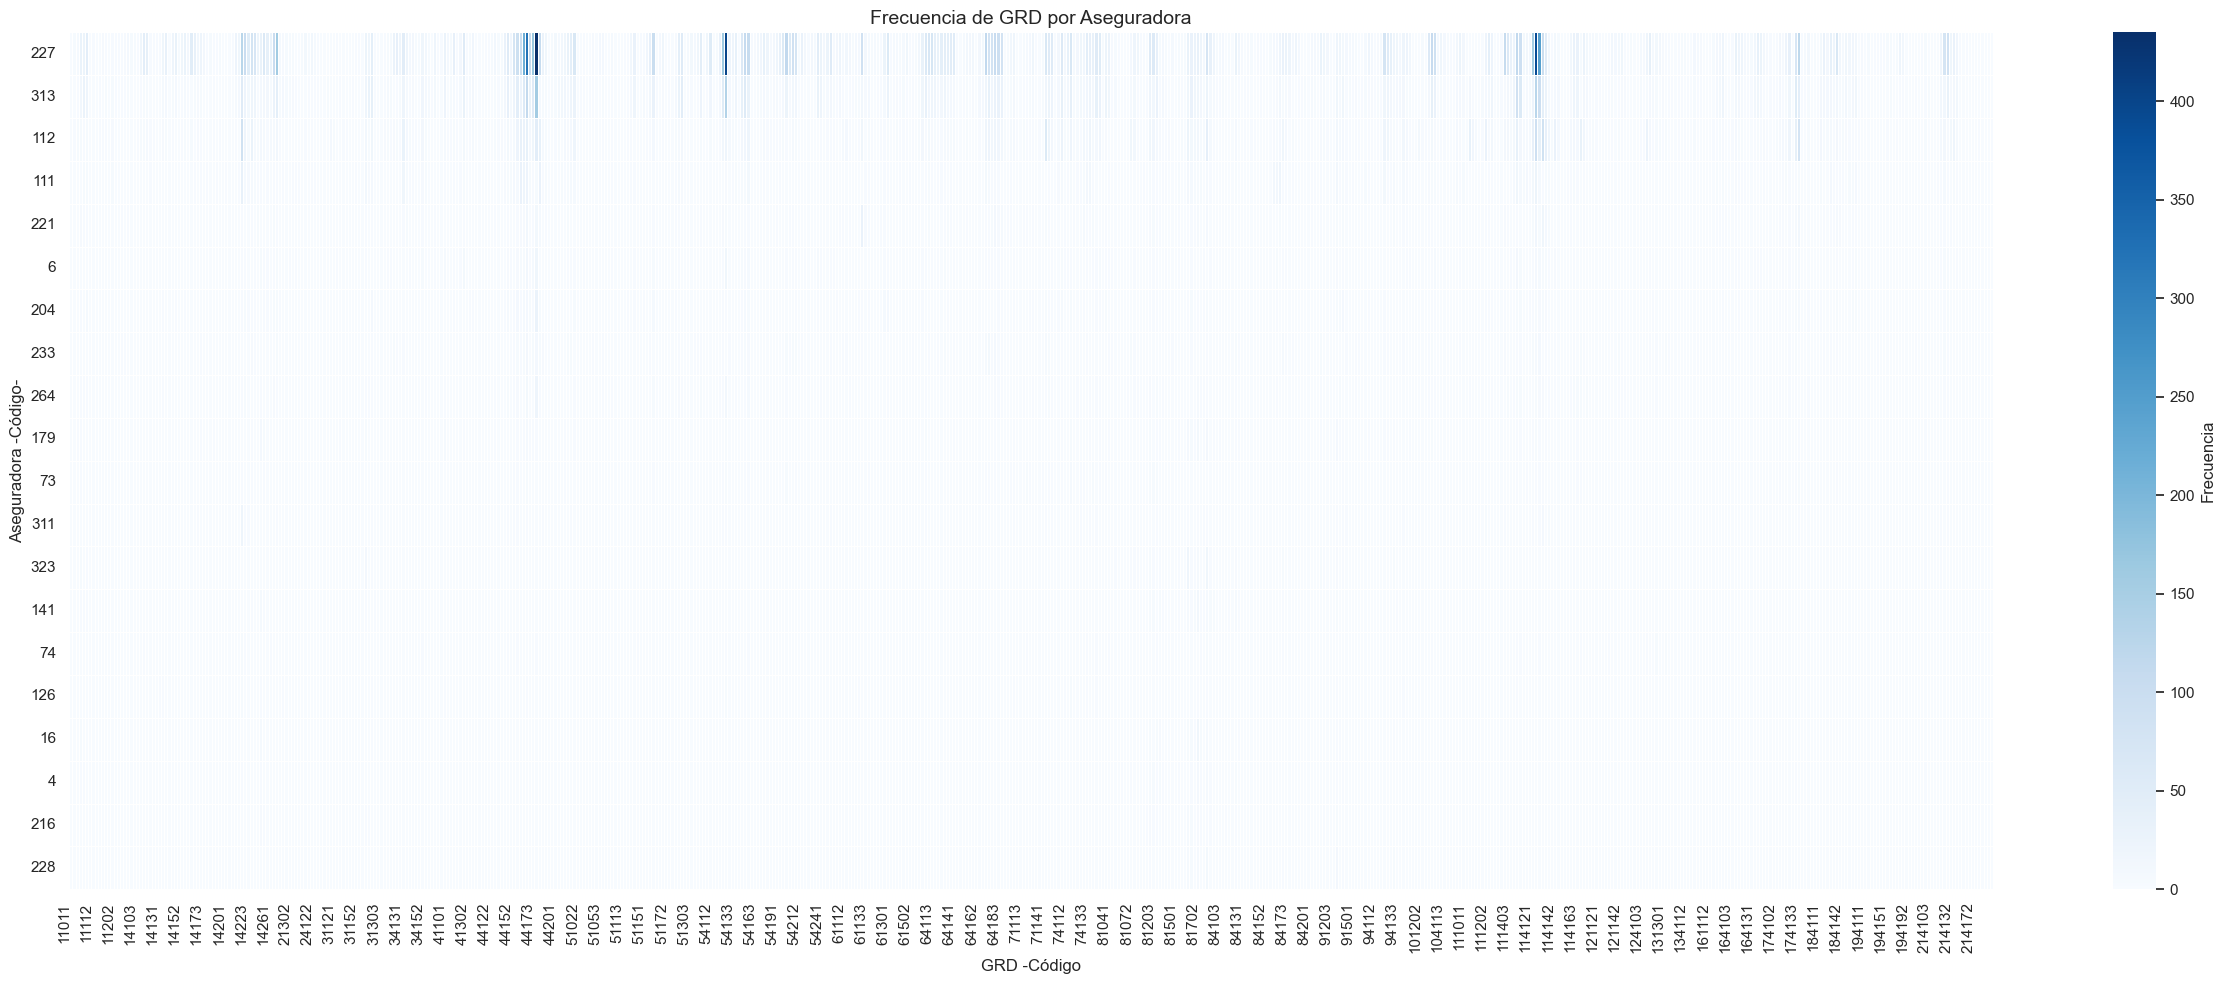

In [3]:
# Ver cuántos códigos y descripciones únicos hay
print(f"Códigos únicos: {df['Aseguradora -Código-'].nunique()}")
print(f"Descripciones únicas: {df['Aseguradora -Descripción-'].nunique()}")

# Verificar si hay valores nulos
print(f"Nulos en código: {df['Aseguradora -Código-'].isnull().sum()}")
print(f"Nulos en descripción: {df['Aseguradora -Descripción-'].isnull().sum()}")

# Crear tabla cruzada para explorar relación entre aseguradora y GRD
ase_gddr = pd.crosstab(df['Aseguradora -Código-'], df['GRD -Código'])

# Filtrar solo las 20 aseguradoras con más registros
top_aseguradoras = df['Aseguradora -Código-'].value_counts().head(20).index
ase_gddr = ase_gddr.loc[top_aseguradoras]

# Graficar heatmap para ver distribución
plt.figure(figsize=(25, 10))
sns.heatmap(ase_gddr, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Frecuencia de GRD por Aseguradora", fontsize=14)
plt.xlabel("GRD -Código")
plt.ylabel("Aseguradora -Código-")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Aseguradora -Código-" representa una codificación numérica de la entidad aseguradora y "Aseguradora -Descripción-" su nombre correspondiente. Ambas variables no presentan valores nulos, pero se observa una discrepancia en la cardinalidad: hay más descripciones únicas que códigos, lo cual indica una posible inconsistencia en la forma de registrar los nombres de aseguradoras, como variaciones ortográficas o duplicaciones semánticas. Aunque hay una diversidad moderada de códigos (62 únicos) y un número mayor de descripciones (71), el análisis gráfico entre GRD y aseguradora muestra una relación muy débil. Incluso para las aseguradoras más frecuentes, no se observa un patrón claro que indique una asociación útil para la predicción. Además, cualquier correlación observada puede estar más relacionada con la población atendida por la aseguradora que con causas clínicas subyacentes. Por estos motivos, y considerando además el riesgo de introducir ruido debido a inconsistencias en los nombres, esta variable se descartará del modelo predictivo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Edad y Grupo de Edad: </strong></p>
    </div>

Valores únicos de Edad: 108
Valores únicos de Grupo Edad: 20
Valores nulos en Edad: 0
Valores nulos en Grupo Edad: 0


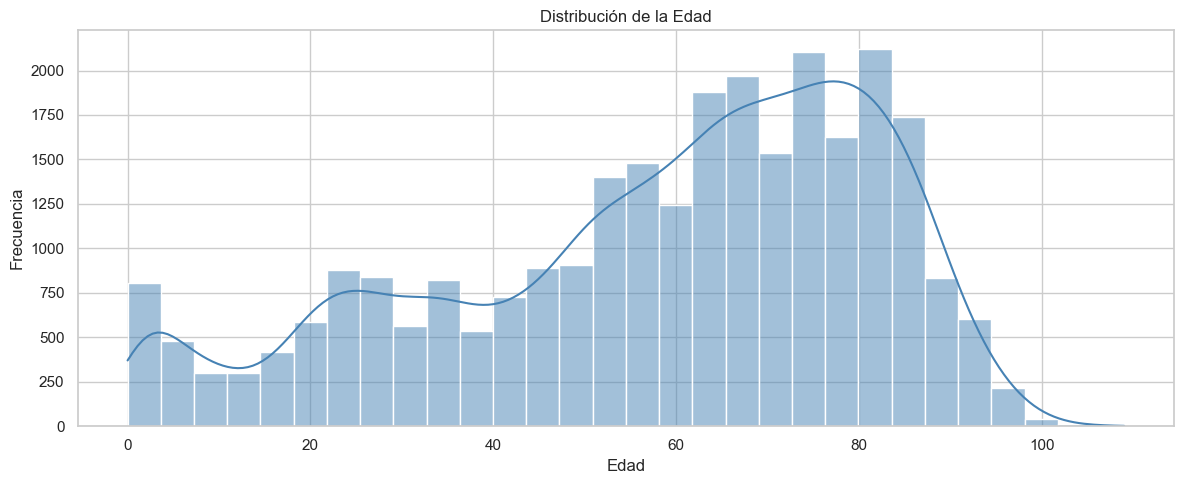


Promedio de edad por GRD:
GRD -Código
194192     4.000000
14201      8.000000
44181      8.802956
184141    11.636364
224121    12.500000
            ...    
54102     81.272727
224122    82.000000
54103     82.142857
44111     85.000000
121153    91.000000
Name: Edad, Length: 608, dtype: float64


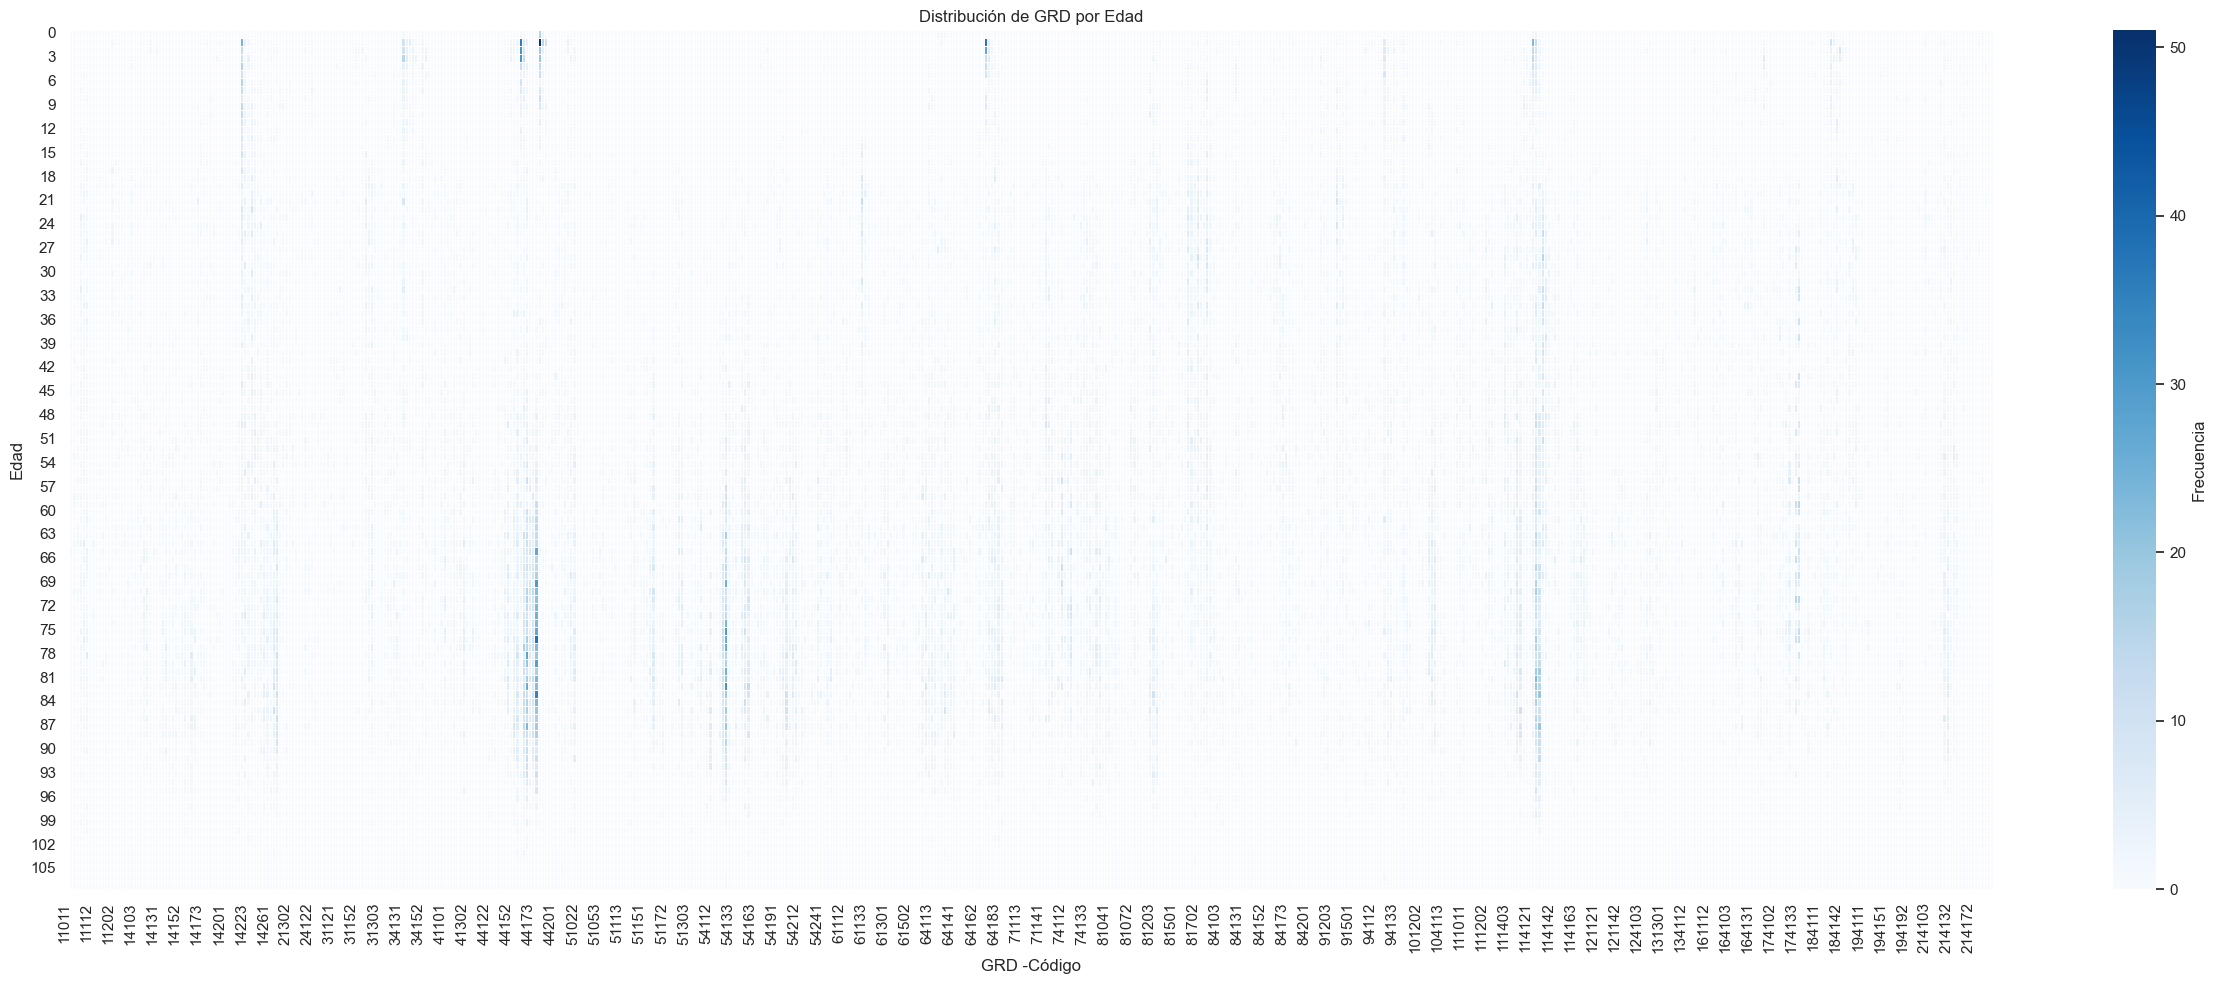

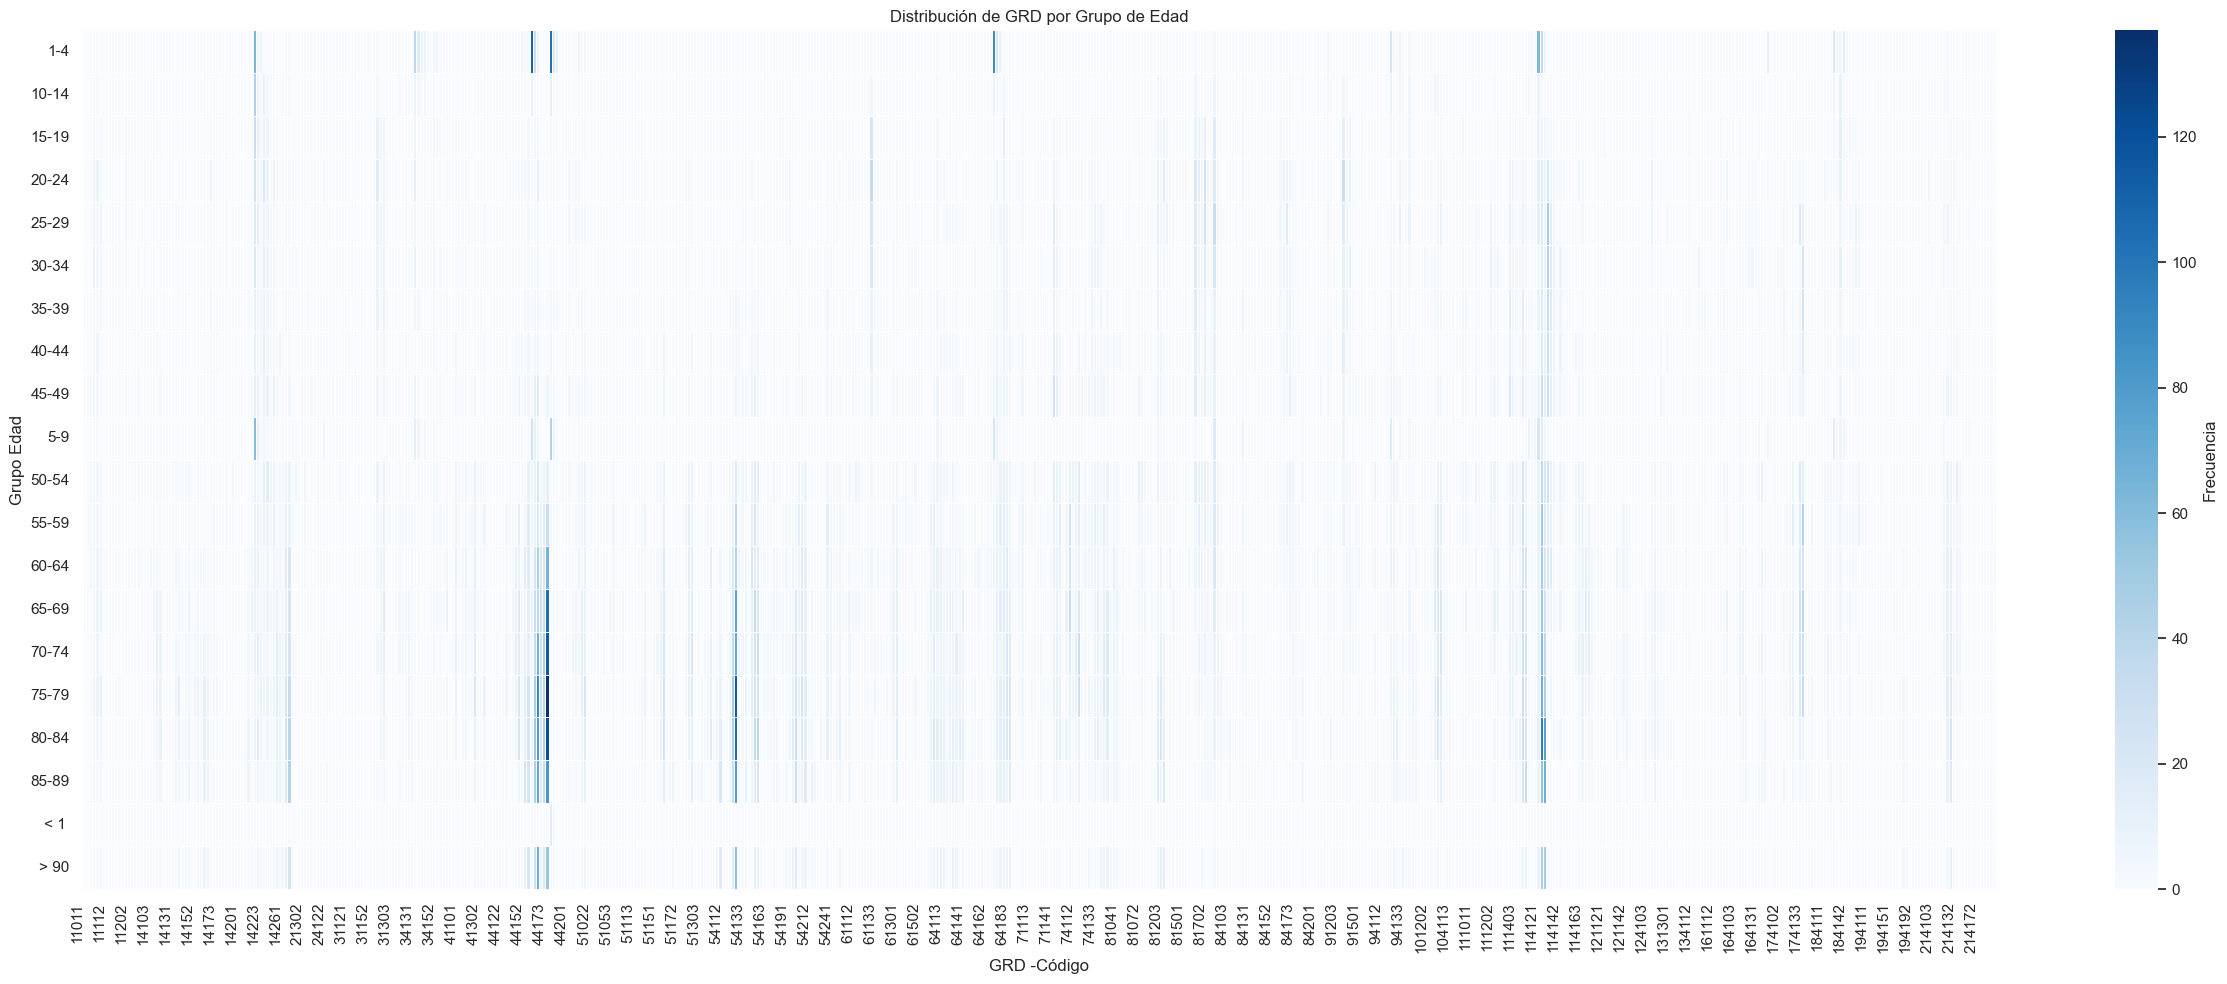


Chi² = 85402.74, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Edad y GRD.

Chi² = 32068.19, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Grupo Edad y GRD.


In [4]:
# Ver cuántos valores únicos hay en Edad y en Grupo Edad
print(f"Valores únicos de Edad: {df['Edad'].nunique()}")
print(f"Valores únicos de Grupo Edad: {df['Grupo Edad'].nunique()}")

# Verificar si hay valores nulos
print(f"Valores nulos en Edad: {df['Edad'].isnull().sum()}")
print(f"Valores nulos en Grupo Edad: {df['Grupo Edad'].isnull().sum()}")

# Histograma de distribución de edades
plt.figure(figsize=(12, 5))
sns.histplot(df['Edad'], bins=30, kde=True, color='steelblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Agrupar por GRD y calcular la edad promedio
edad_promedio_grd = df.groupby('GRD -Código')['Edad'].mean().sort_values()
print(f"\nPromedio de edad por GRD:\n{edad_promedio_grd}")

# Crear tablas cruzadas para Edad y Grupo Edad vs GRD
edad_grd = pd.crosstab(df['Edad'], df['GRD -Código'])
grupo_grd = pd.crosstab(df['Grupo Edad'], df['GRD -Código'])

# Heatmap Edad vs GRD
plt.figure(figsize=(25, 10))
sns.heatmap(edad_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Edad")
plt.xlabel("GRD -Código")
plt.ylabel("Edad")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Heatmap Grupo Edad vs GRD
plt.figure(figsize=(25, 10))
sns.heatmap(grupo_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Grupo de Edad")
plt.xlabel("GRD -Código")
plt.ylabel("Grupo Edad")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de contingencia para Edad
chi2, p, dof, expected = chi2_contingency(edad_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Edad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")

# Prueba de contingencia para Grupo Edad
chi2, p, dof, expected = chi2_contingency(grupo_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Grupo Edad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Edad" es continua y numérica, sin valores nulos, con 108 valores distintos que abarcan todo el espectro etario. Su versión categorizada, "Grupo Edad", cuenta con 20 grupos definidos (quinquenales), también sin valores faltantes. Ambas variables muestran una distribución esperada, con una mayor concentración en adultos y adultos mayores. Al relacionarlas con el GRD, se observan asociaciones claras: algunos grupos de edad se vinculan con diagnósticos específicos, lo cual es coherente desde el punto de vista clínico. Los gráficos de calor y los promedios de edad por GRD refuerzan esta relación. "Grupo Edad", al ser categórica, puede facilitar la interpretación y ser más estable frente a pequeñas fluctuaciones, mientras que "Edad" permite una resolución más fina. Se considera que la variable "Grupo Edad" es más relevante para el módelo predictivo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Sexo: </strong></p>
    </div>

Valores únicos de Sexo: ['F' 'M']
Valores nulos de Sexo: 0

Frecuencia por categoría:
Sexo
M    14355
F    13514
Name: count, dtype: int64


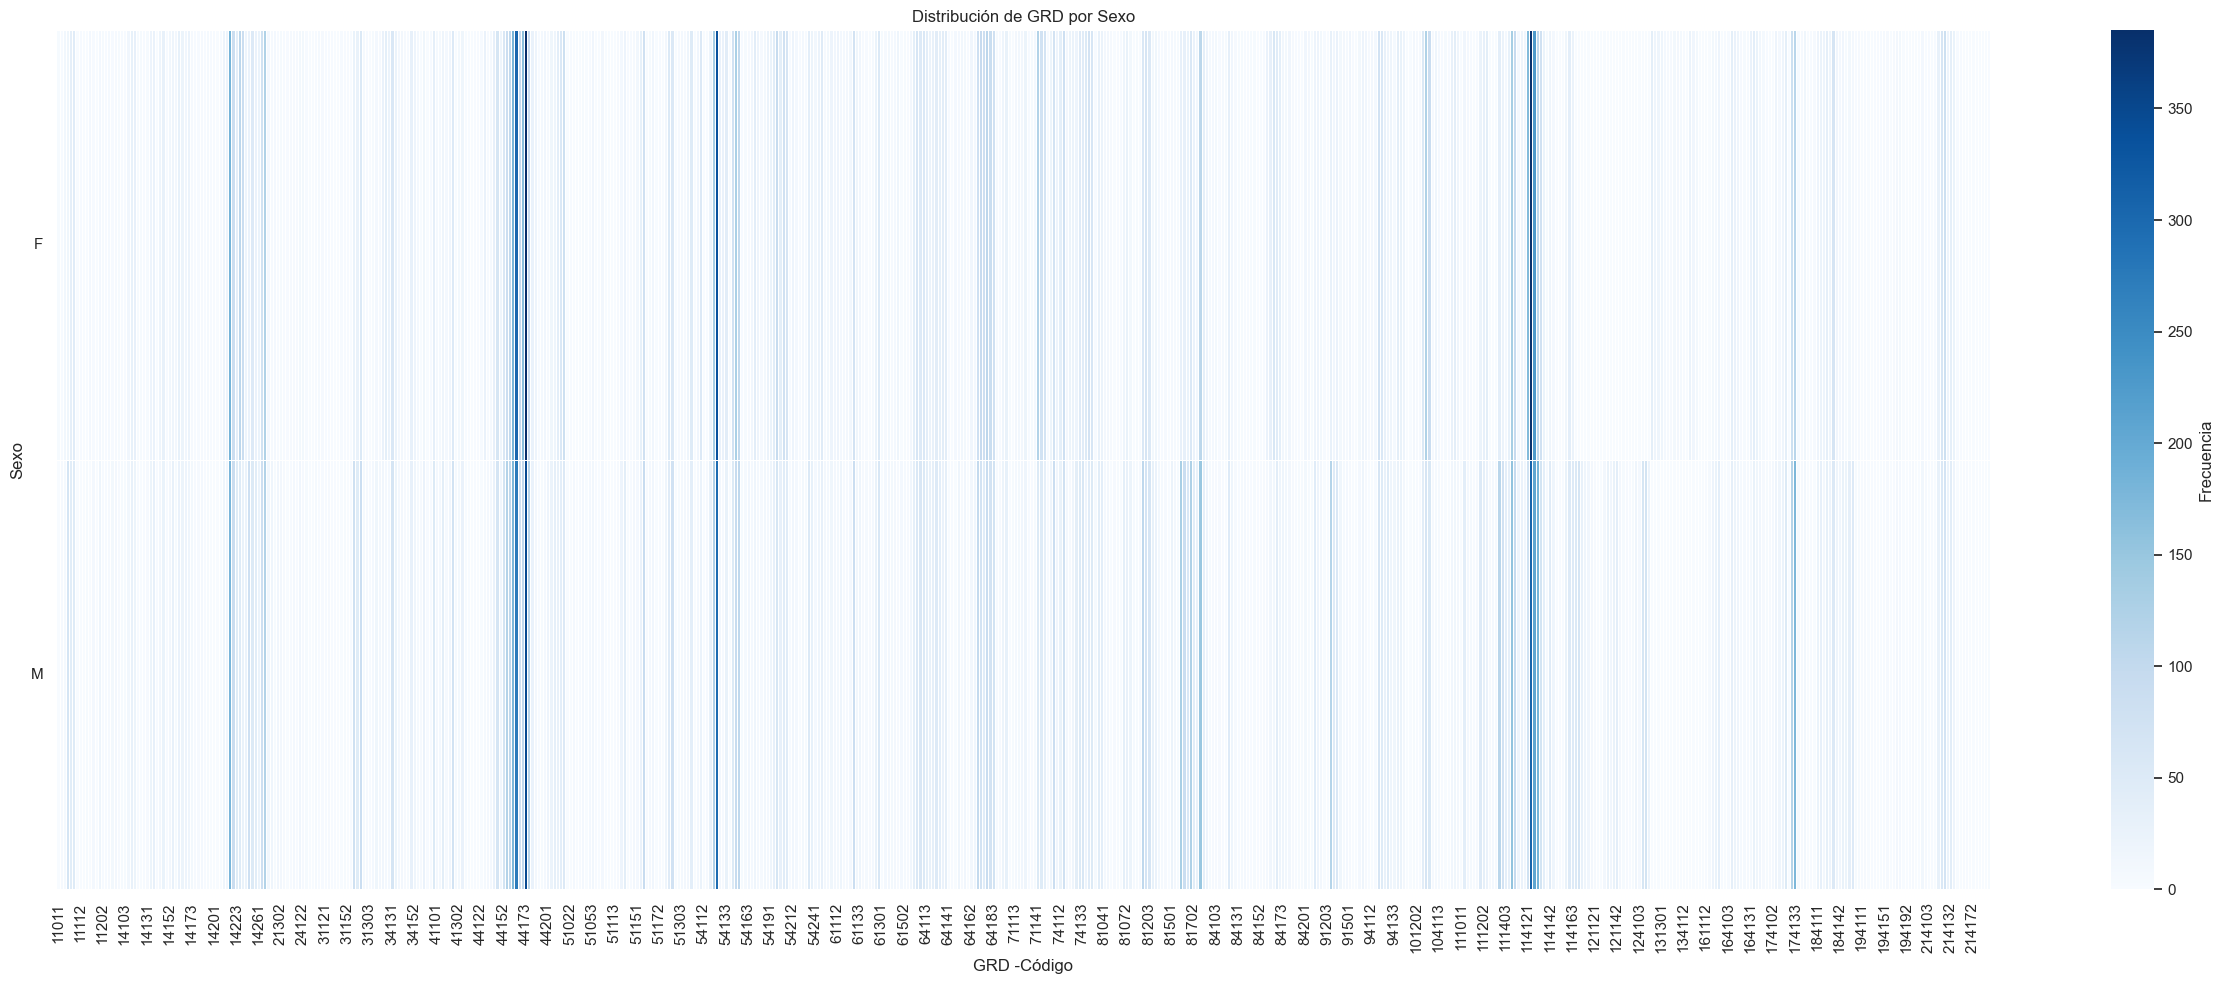


Chi² = 2417.19, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Sexo y GRD.


In [5]:
# Normalizar texto: convertir todo a mayúsculas para evitar inconsistencias
df['Sexo'] = df['Sexo'].str.upper()

# Ver valores únicos y nulos
print(f"Valores únicos de Sexo: {df['Sexo'].unique()}")
print(f"Valores nulos de Sexo: {df['Sexo'].isnull().sum()}")

# Frecuencia por categoría
print("\nFrecuencia por categoría:")
print(df['Sexo'].value_counts())

# Crear tabla cruzada Sexo vs GRD
sexo_grd = pd.crosstab(df['Sexo'], df['GRD -Código'])

# Heatmap de la relación
plt.figure(figsize=(25, 10))
sns.heatmap(sexo_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Sexo")
plt.xlabel("GRD -Código")
plt.ylabel("Sexo")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, expected = chi2_contingency(sexo_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Sexo y GRD.")
else:
    print("→ No se encontró una asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Sexo" está codificada con solo dos categorías ('M' y 'F') y no presenta valores nulos. Tras estandarizar el texto, se confirma su integridad. El análisis de frecuencias muestra una distribución relativamente balanceada entre hombres y mujeres, lo cual es positivo para el modelo. La tabla cruzada y el mapa de calor evidencian diferencias sutiles en la frecuencia de ciertos GRD según el sexo. La prueba de chi-cuadrado arroja un p-value < 0.05, lo que indica una asociación estadísticamente significativa entre el sexo del paciente y el grupo relacionado por diagnóstico. Esta variable es categórica binaria, simple de codificar y relevante, por lo que se mantendrá en el modelo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Código de ciudad: </strong></p>
    </div>

Valores únicos en 'Código de ciudad': 208
Valores nulos en 'Código de ciudad': 0

Top 5 ciudades más frecuentes:
Codigo de ciudad
5001    18236
5088     1424
5360      687
5266      614
5212      454
Name: count, dtype: int64


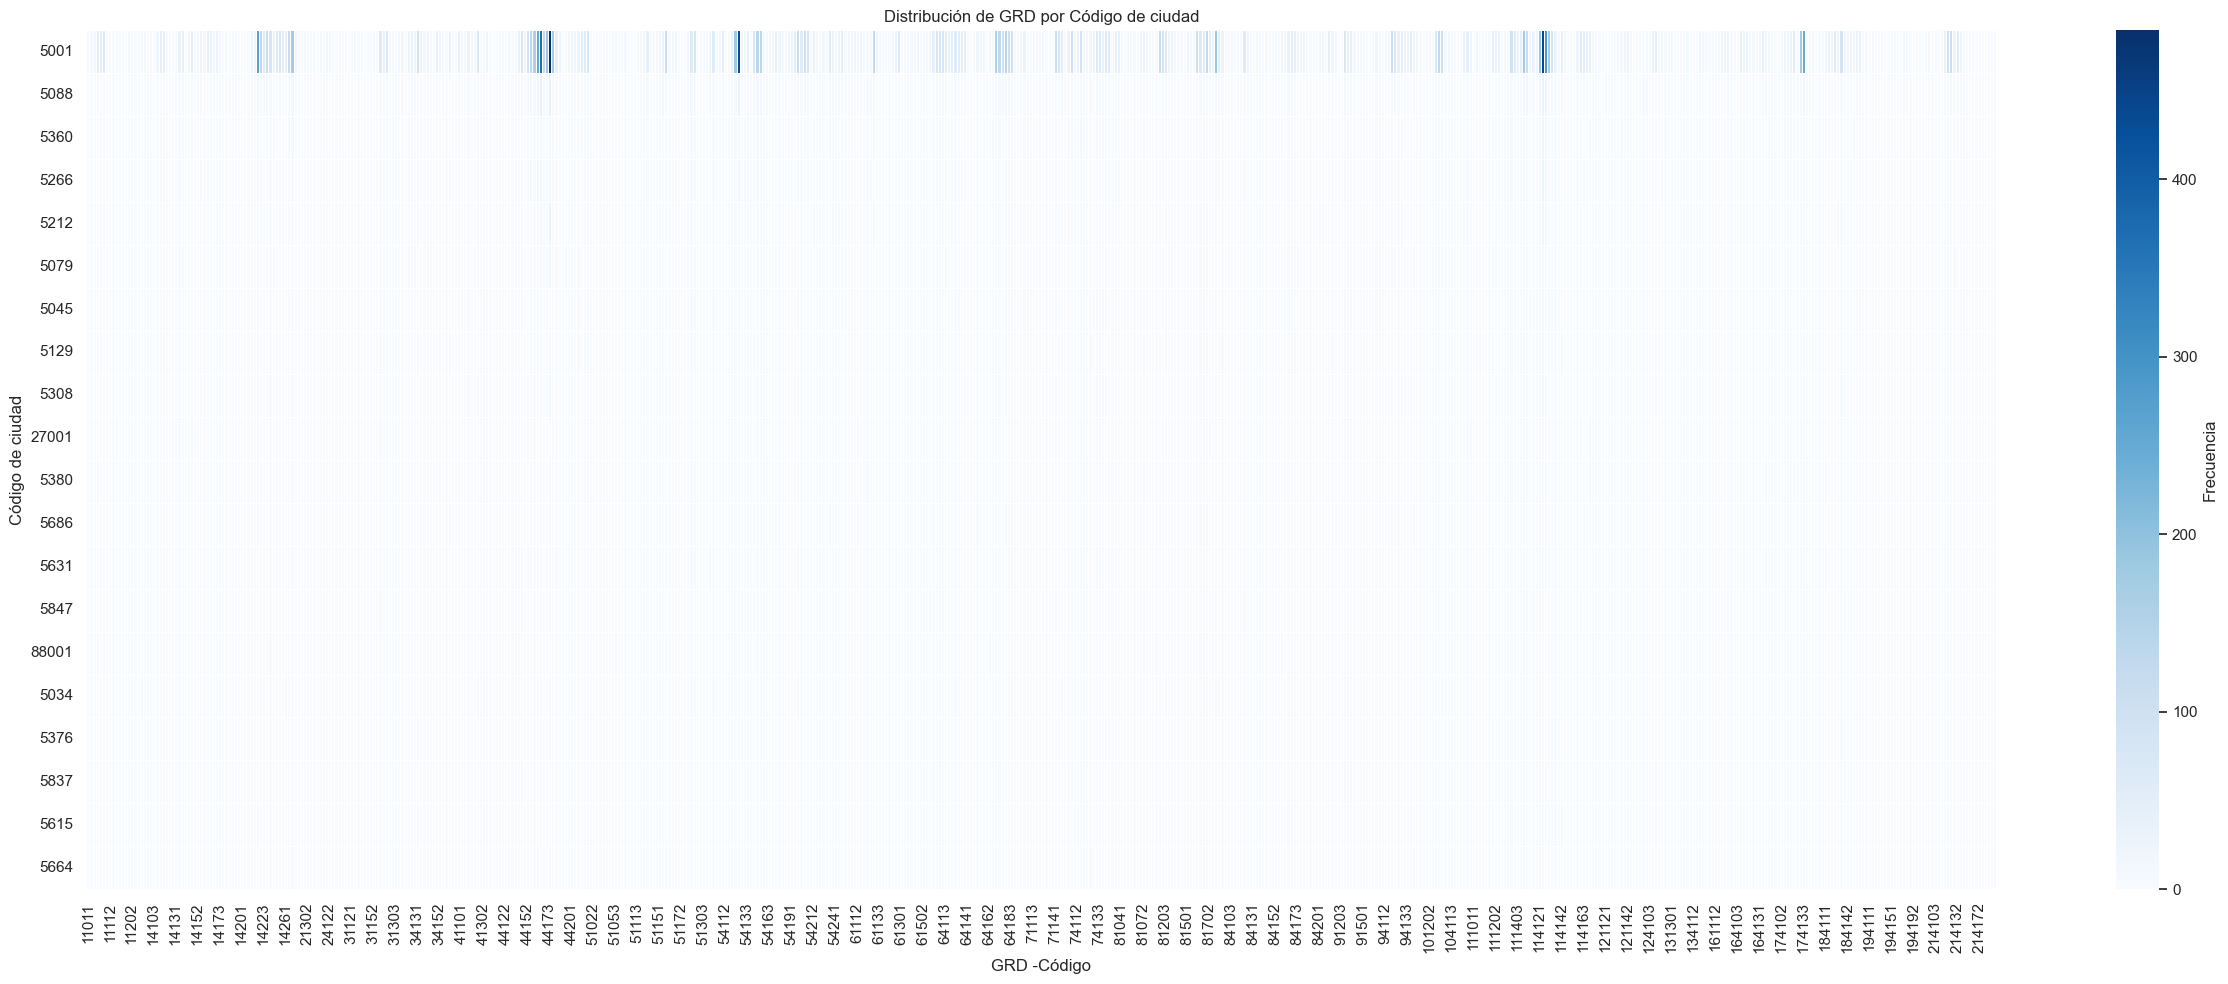


Chi² = 154240.11, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre ciudad y GRD.


In [6]:
# Ver cuántos valores únicos hay en 'Código de ciudad'
print(f"Valores únicos en 'Código de ciudad': {df['Codigo de ciudad'].nunique()}")

# Verificar si hay valores nulos
print(f"Valores nulos en 'Código de ciudad': {df['Codigo de ciudad'].isnull().sum()}")

# Ver top 5 ciudades más frecuentes
print("\nTop 5 ciudades más frecuentes:")
print(df['Codigo de ciudad'].value_counts().head())

# Tabla cruzada Código ciudad vs GRD
ciudad_grd = pd.crosstab(df['Codigo de ciudad'], df['GRD -Código'])

# Reducir a las 20 ciudades más frecuentes para visualización
top_ciudades = df['Codigo de ciudad'].value_counts().head(20).index
ciudad_grd_top = ciudad_grd.loc[top_ciudades]

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(ciudad_grd_top, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Código de ciudad")
plt.xlabel("GRD -Código")
plt.ylabel("Código de ciudad")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

chi2, p, dof, _ = chi2_contingency(ciudad_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre ciudad y GRD.")
else:
    print("→ No se encontró una asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Código de ciudad" no presenta valores nulos y contiene 208 valores únicos, lo cual implica una alta cardinalidad. Aunque se pueden identificar algunas ciudades con alta frecuencia como Medellín (código 5001), muchas otras tienen pocos registros, lo que introduce una gran cantidad de categorías poco representativas. El análisis visual mediante heatmap centrado en las 20 ciudades más frecuentes muestra diferencias leves entre ciudades otras ciudades a parte de Medellín, por lo que el comportamiento general es difuso. A pesar de que la prueba de chi-cuadrado muestra una relación estadísticamente significativa entre el código de ciudad y el GRD, la utilidad práctica de esta variable está desbalanceada: su significado es más geográfico-administrativo que clínico, y su alta dimensionalidad introduce complejidad sin aportar una interpretación clara. Por estos motivos, y considerando además el riesgo de introducir ruido esta variable se descartará del modelo predictivo.</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Fecha de ingreso: </strong></p>
    </div>


Distribución de ingresos por mes:
Enero         2600
Febrero       2245
Marzo         2373
Abril         2294
Mayo          2339
Junio         2341
Julio         2389
Agosto        2299
Septiembre    2458
Octubre       2326
Noviembre     1981
Diciembre     2063
Name: count, dtype: int64


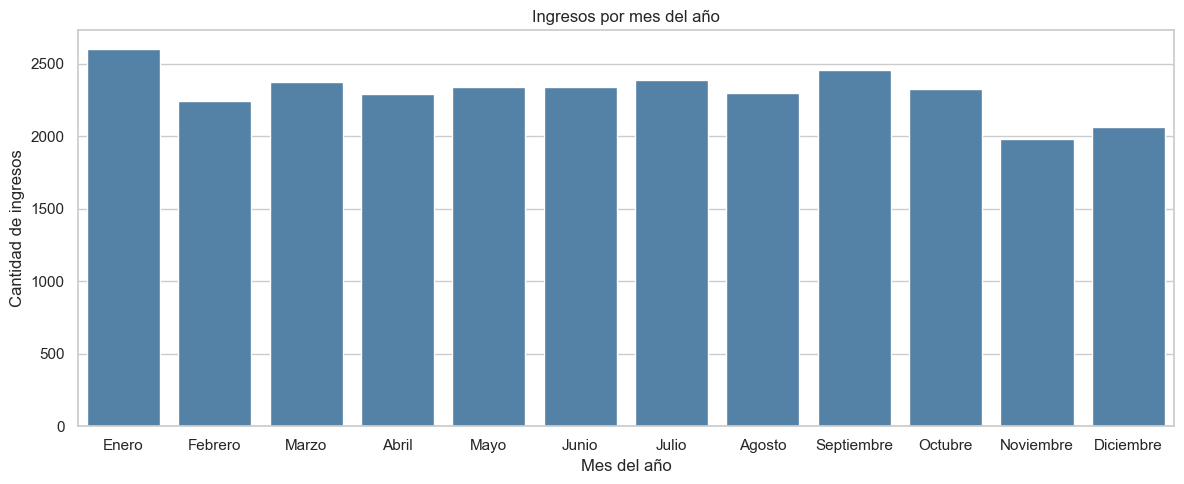


Distribución de ingresos por día de la semana:
Lunes        3487
Martes       3102
Miércoles    4239
Jueves       4184
Viernes      4206
Sábado       4354
Domingo      4136
Name: count, dtype: int64


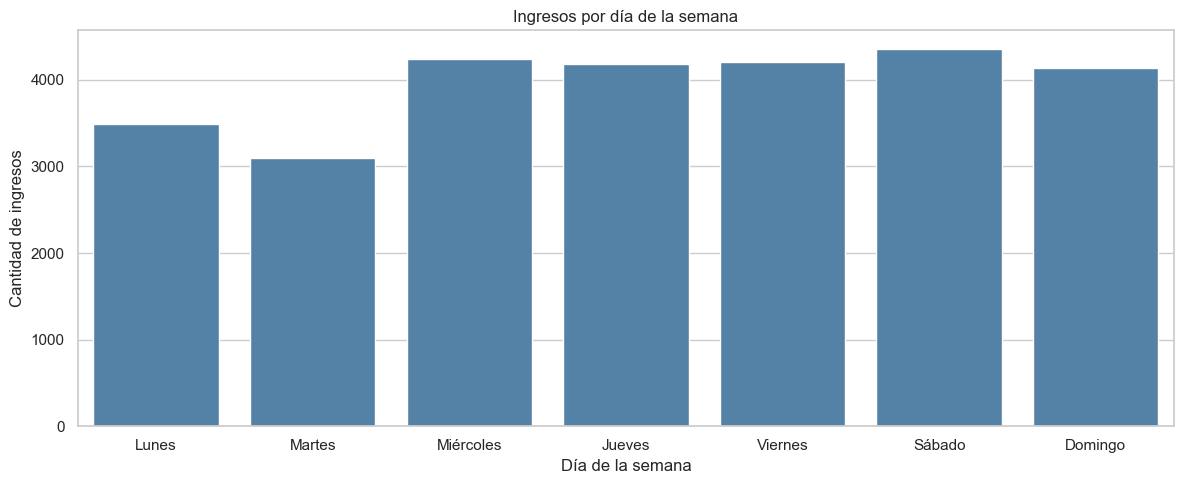

In [7]:
# Convertir la columna a datetime con formato específico
fecha_temp = pd.to_datetime(df['Fecha de ingreso'], format='%d%m%Y', errors='coerce')

# Extraer mes y día de la semana
df['Mes ingreso'] = fecha_temp.dt.month
df['Día semana ingreso'] = fecha_temp.dt.dayofweek

# Distribución por mes
meses = df['Mes ingreso'].value_counts().sort_index()
# Nombres de los meses
nombre_mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
              "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
# Asegurar indices enteros
meses.index = meses.index.astype(int)
meses.index = [nombre_mes[i - 1] for i in meses.index]

print("\nDistribución de ingresos por mes:")
print(meses)

plt.figure(figsize=(12,5))
sns.barplot(x=meses.index, y=meses.values, color='steelblue')
plt.title("Ingresos por mes del año")
plt.xlabel("Mes del año")
plt.ylabel("Cantidad de ingresos")
plt.tight_layout()
plt.show()

# Distribución por día de la semana
dias = df['Día semana ingreso'].value_counts().sort_index()
nombre_dia = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
# Asegurar indices enteros
dias.index = dias.index.astype(int)
dias.index = [nombre_dia[i] for i in dias.index]

print("\nDistribución de ingresos por día de la semana:")
print(dias)

plt.figure(figsize=(12,5))
sns.barplot(x=dias.index, y=dias.values, color='steelblue')
plt.title("Ingresos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de ingresos")
plt.tight_layout()
plt.show()

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;">La variable "Fecha de ingreso" fue convertida exitosamente al formato datetime, permitiendo extraer componentes temporales como el mes del año y el día de la semana. Aunque no hay valores nulos explícitos, la utilidad clínica de esta variable es cuestionable: la distribución de ingresos por mes y por día de la semana es bastante homogénea, sin picos evidentes que indiquen estacionalidad médica clara. El análisis cruzado con GRD muestra diferencias mínimas. En términos prácticos, la variable introduce más ruido que señal y no aporta una base fisiopatológica para mejorar la predicción. Por tanto, se excluirá del modelo.
</p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Tipo de ingreso: </strong></p>
    </div>

Valores únicos de Tipo de ingreso: ['URGENCIA' 'PROGRAMADO']
Valores nulos de Tipo de ingreso: 0

Frecuencia por categoría: Tipo de ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64


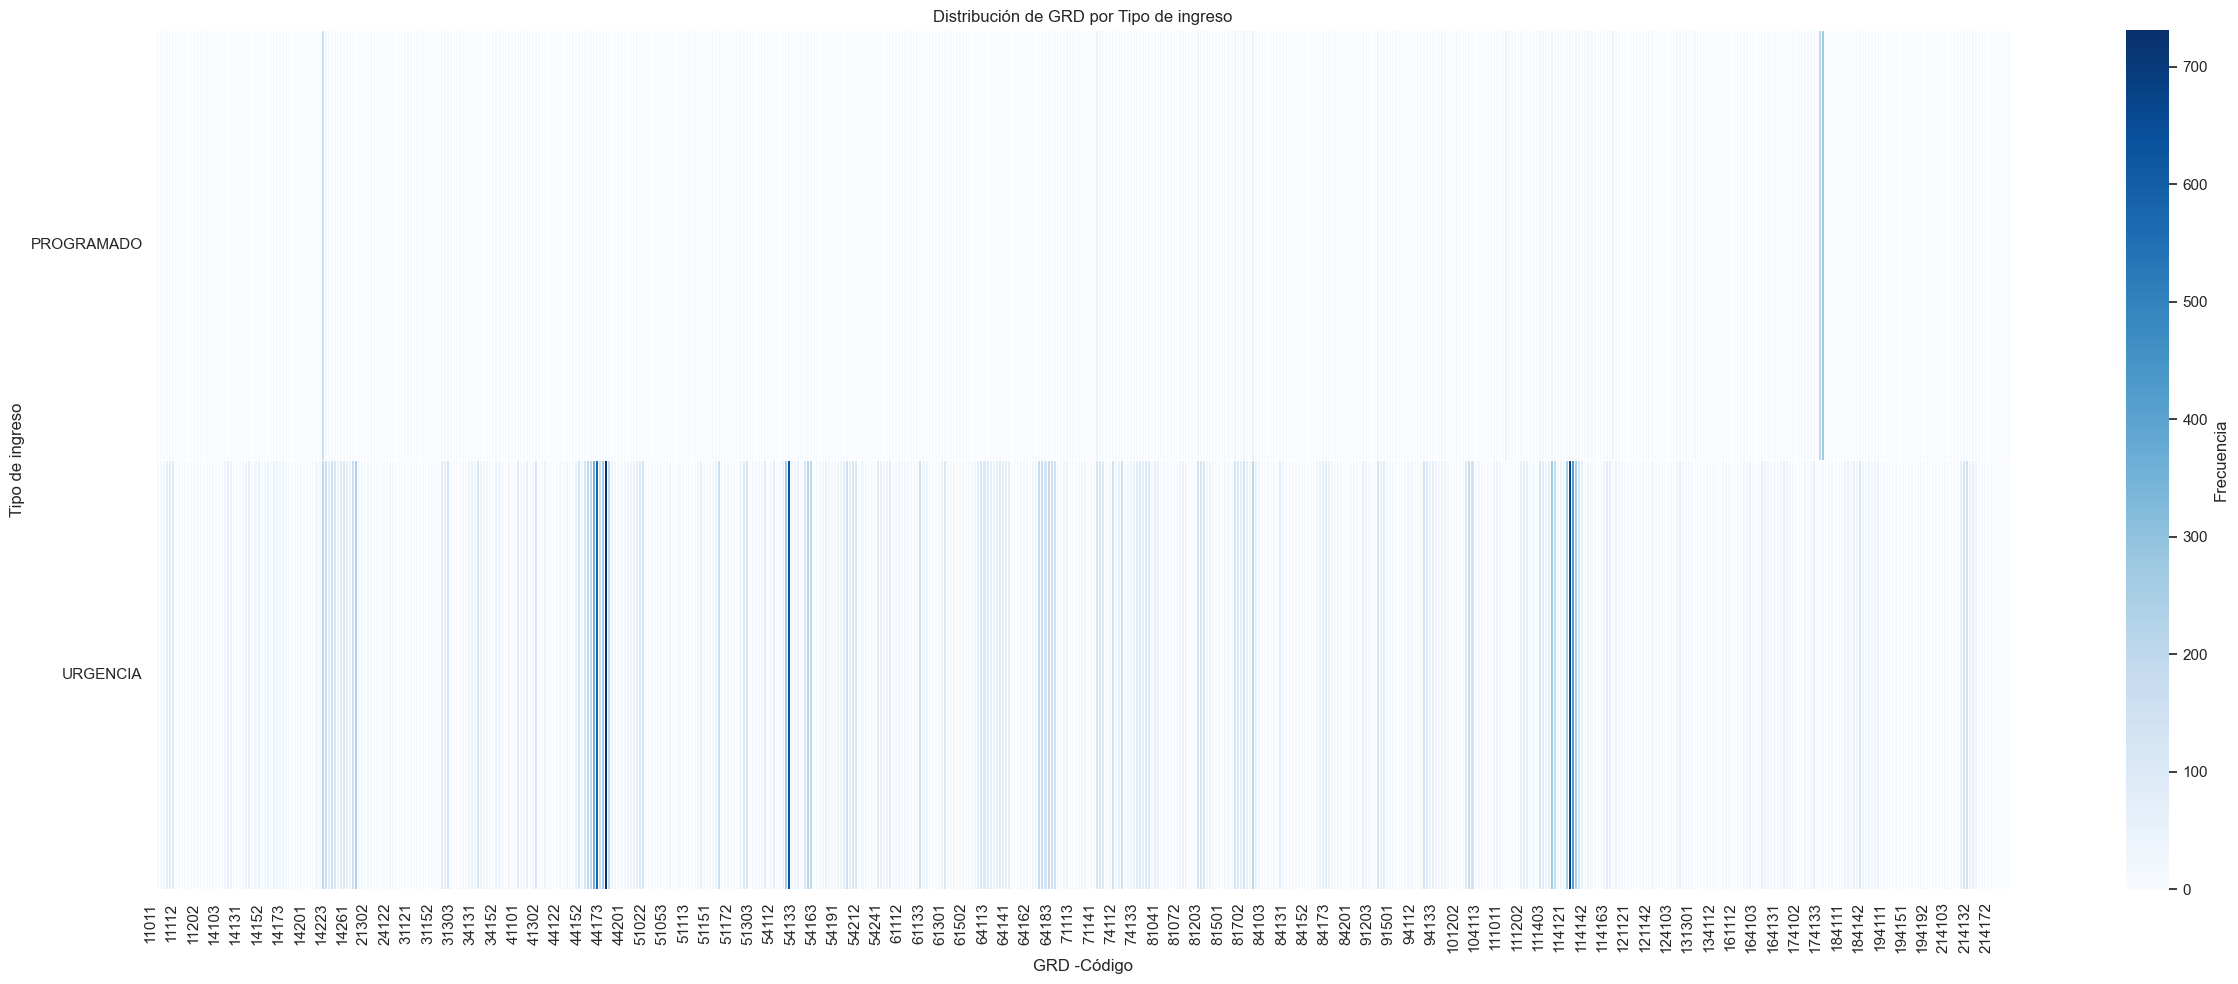


Chi² = 10381.03, p-value = 0.0000
→ Hay una asociación estadísticamente significativa entre Tipo de ingreso y GRD.


In [8]:
# Normalizar texto: quitar espacios, convertir a mayúsculas
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.strip().str.upper()

# Unificar variantes comunes (por si acaso)
df['Tipo de ingreso'] = df['Tipo de ingreso'].replace({
    'URGENCIAS': 'URGENCIA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos de Tipo de ingreso: {df['Tipo de ingreso'].unique()}")
print(f"Valores nulos de Tipo de ingreso: {df['Tipo de ingreso'].isnull().sum()}")

# Frecuencia por categoría
print(f"\nFrecuencia por categoría: {df['Tipo de ingreso'].value_counts()}")

# Tabla cruzada Tipo de ingreso vs GRD
ingreso_grd = pd.crosstab(df['Tipo de ingreso'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(ingreso_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Tipo de ingreso")
plt.xlabel("GRD -Código")
plt.ylabel("Tipo de ingreso")
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba de Chi-cuadrado
chi2, p, dof, _ = chi2_contingency(ingreso_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación estadísticamente significativa entre Tipo de ingreso y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Tipo de ingreso" presenta dos categorías claramente diferenciadas: "URGENCIA" y "PROGRAMADO", sin valores nulos y con formato homogéneo tras la normalización. Aunque hay un fuerte desbalance (más del 90% de los ingresos son por urgencia), los resultados del análisis gráfico y la prueba estadística muestran que el tipo de ingreso sí tiene una asociación significativa con el GRD. En particular, ciertos diagnósticos se concentran más en ingresos de urgencia, lo cual tiene sentido clínico (por ejemplo, traumas, eventos cardiovasculares agudos o infecciones graves). A pesar del desbalance, esta variable es informativa y relevante. Se conservará como categórica binaria en el modelo, ya que su aporte es claro tanto estadística como clínicamente.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Diagnostico de ingreso: </strong></p>
    </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variables Diagnósticos relacionados y/o comorbilidades de ingreso: </strong></p>
    </div>

Columnas de comorbilidades: ['Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4', 'Dxr 5', 'Dxr 6', 'Dxr 7', 'Dxr 8', 'Dxr 9', 'Dxr 10']

Cantidad de diagnósticos registrados en cada columna:
Dxr 1     27172
Dxr 2     24714
Dxr 3     21529
Dxr 4     17983
Dxr 5     14451
Dxr 6     11163
Dxr 7      8161
Dxr 8      5610
Dxr 9      3435
Dxr 10        1
dtype: int64

Top 20 comorbilidades más frecuentes:
I10     7463
Z720    3315
E038    2759
I270    2728
I120    2115
E106    2080
D648    2009
E116    1827
J448    1792
E876    1660
N390    1615
D728    1562
G448    1537
I48     1504
R104    1499
E755    1488
I110    1278
E788    1220
J441    1208
J90     1153
Name: count, dtype: int64


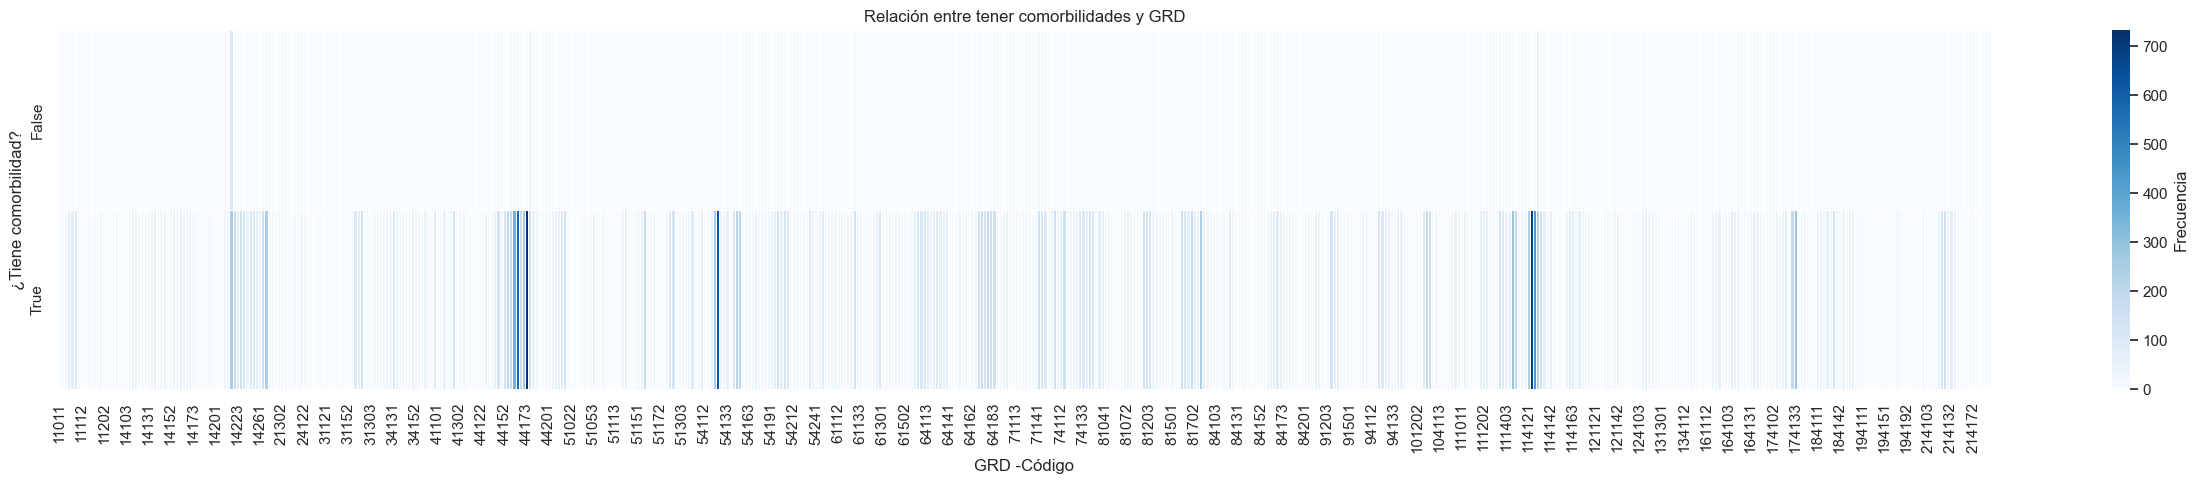


Chi² = 4269.45, p-value = 0.0000
→ Hay una asociación significativa entre tener comorbilidades y el GRD.


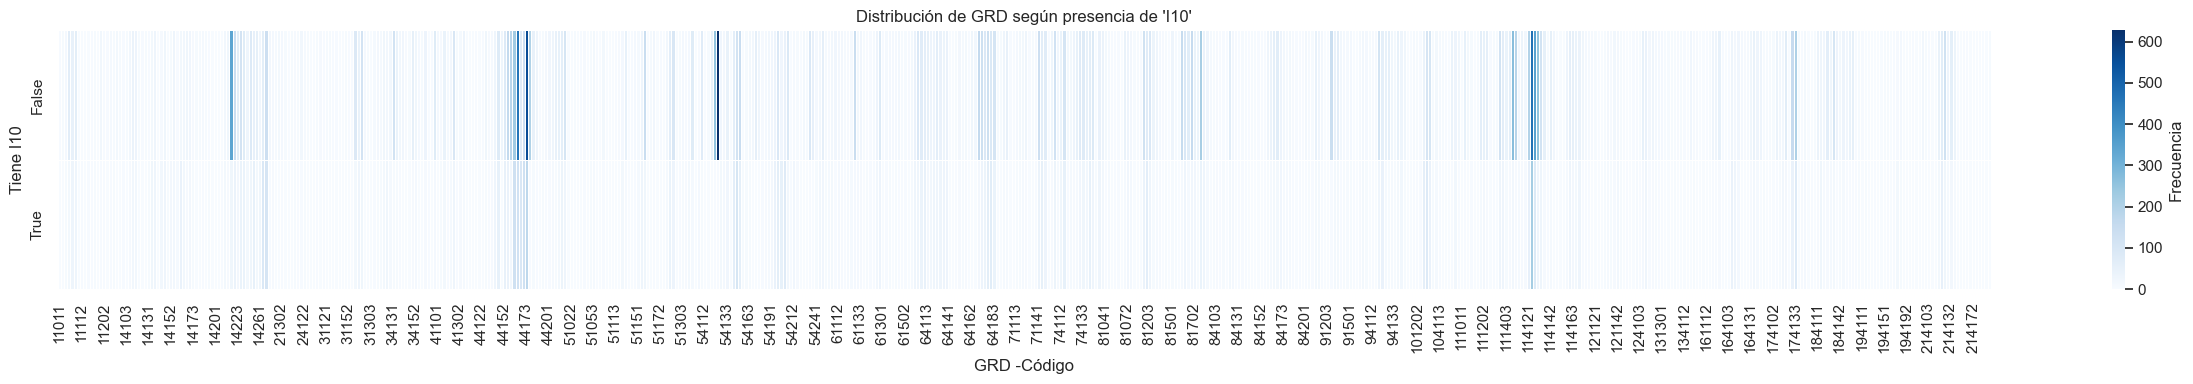

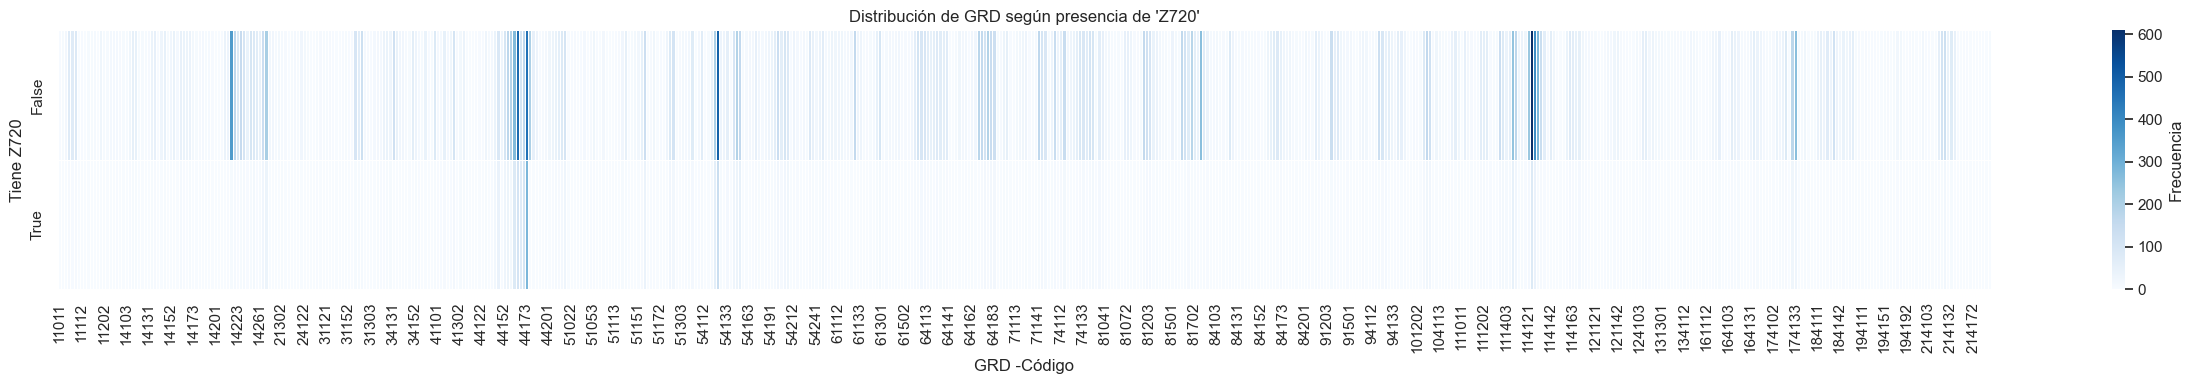

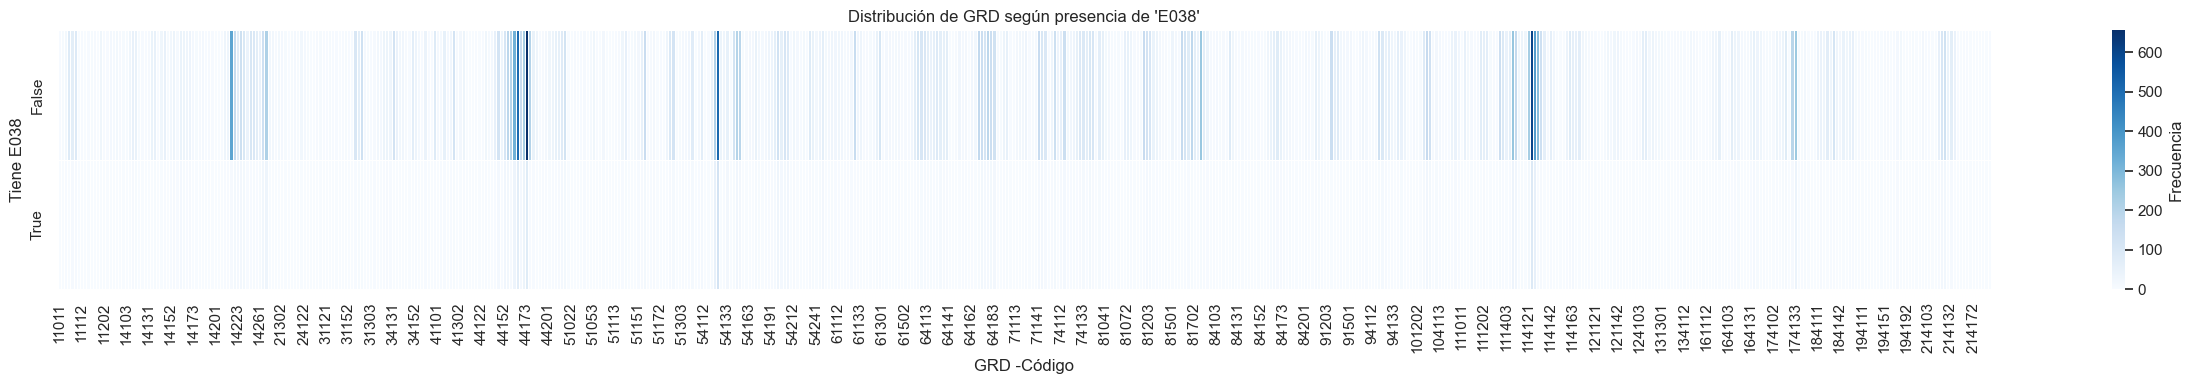

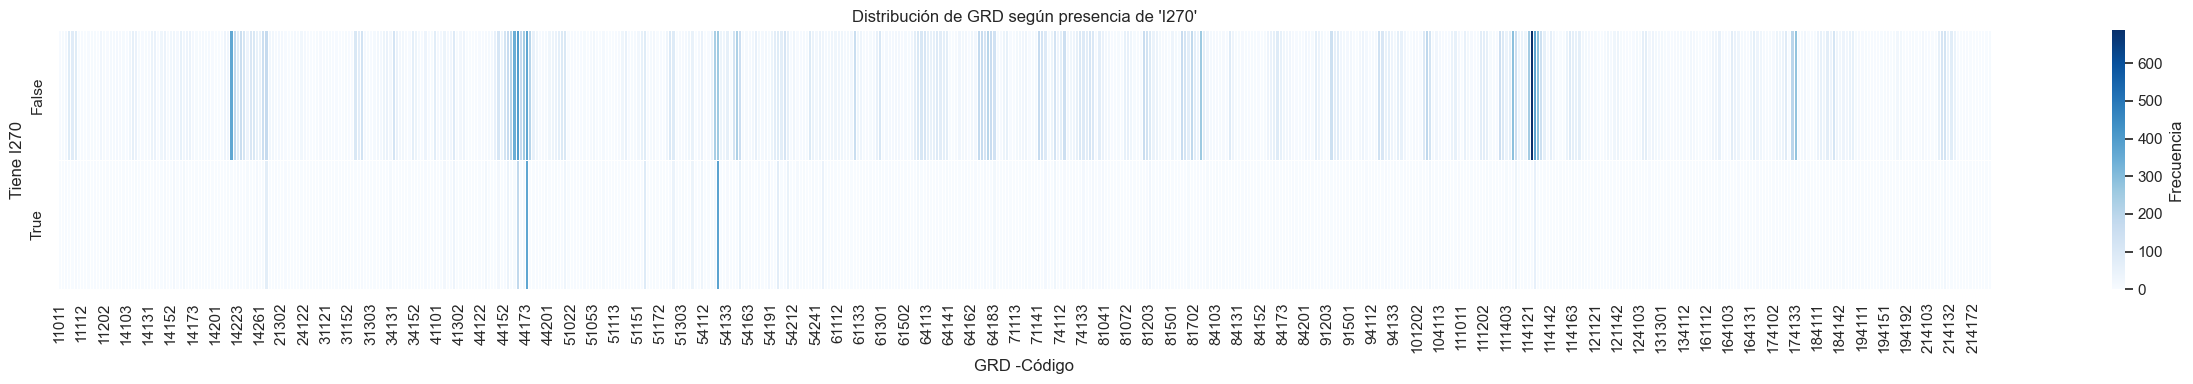

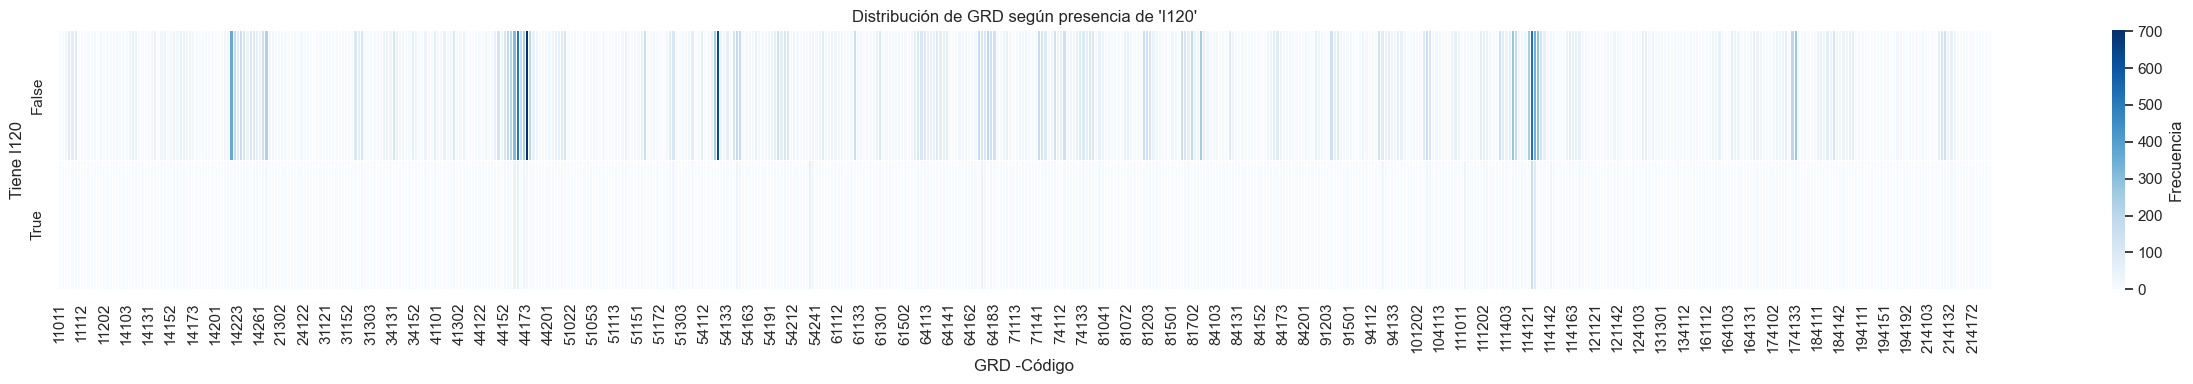

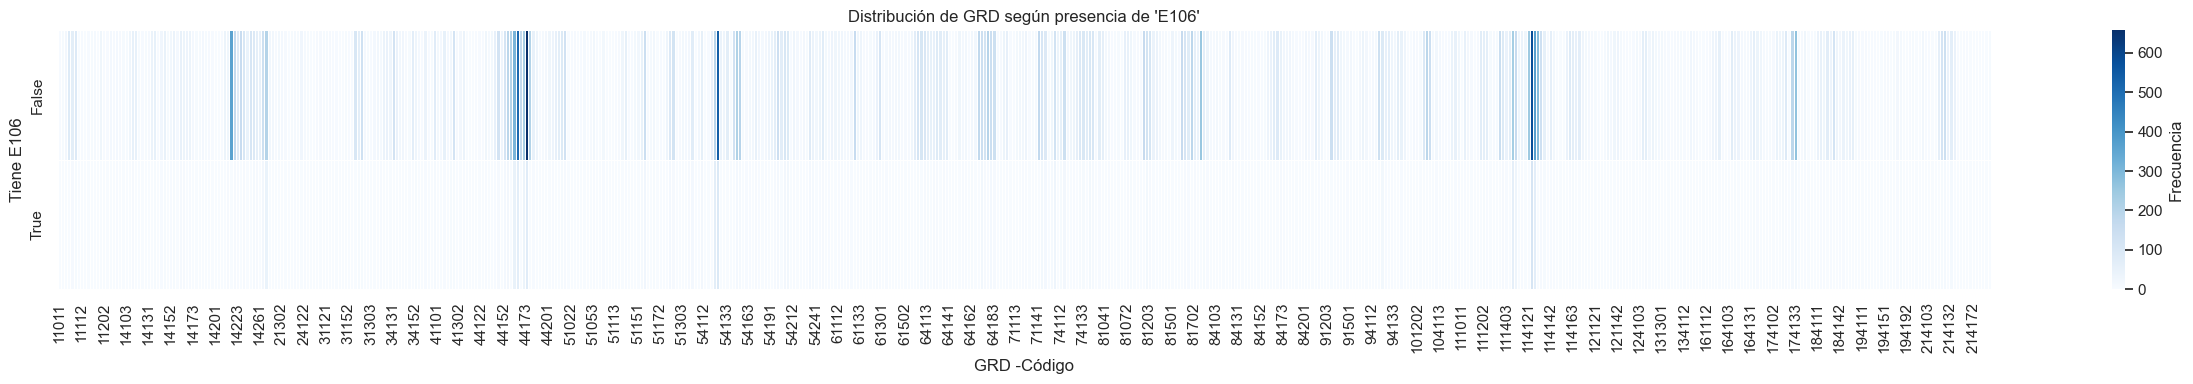

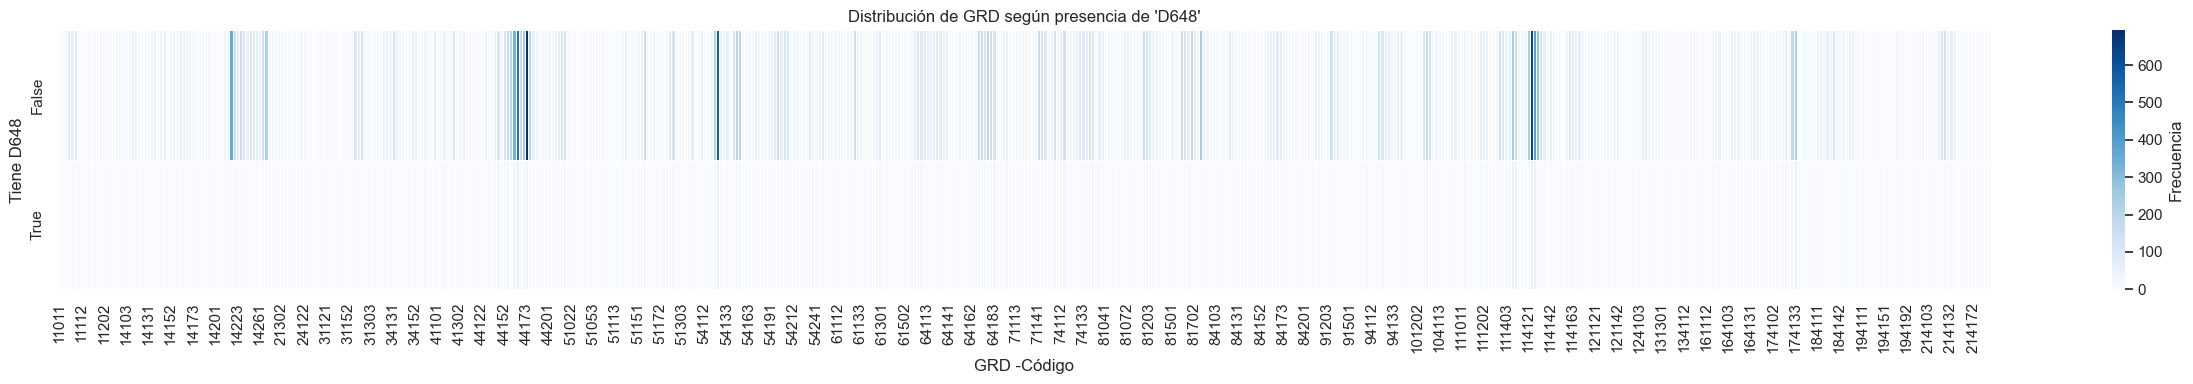

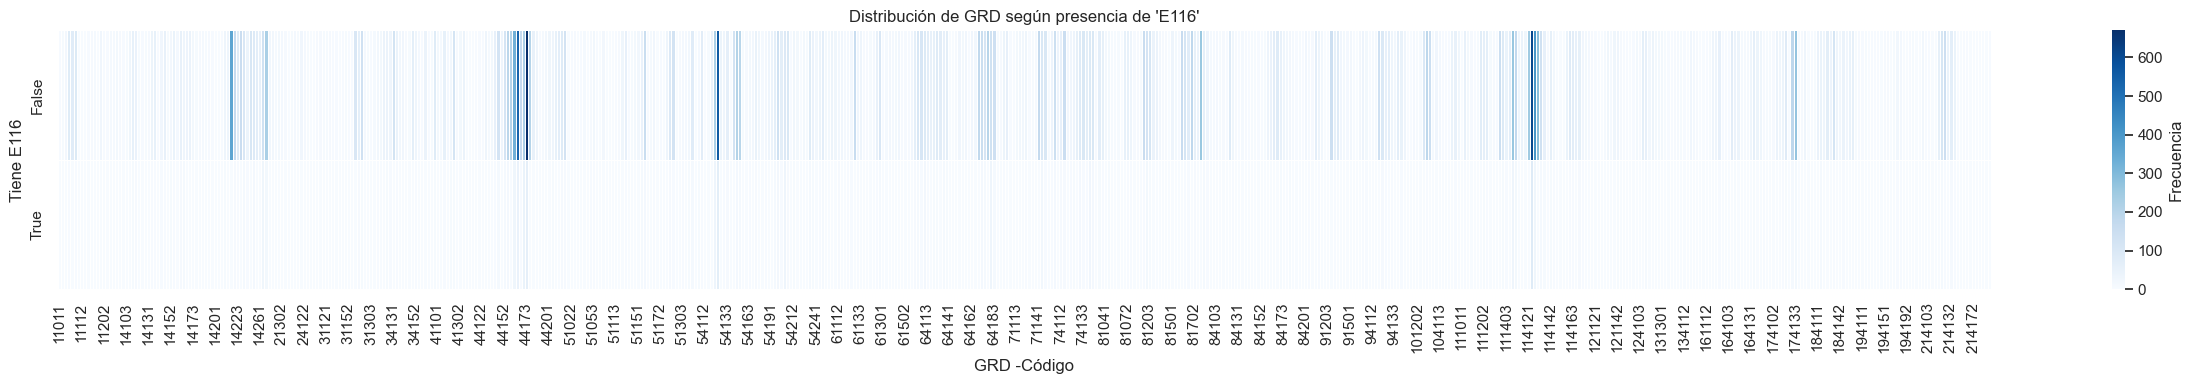

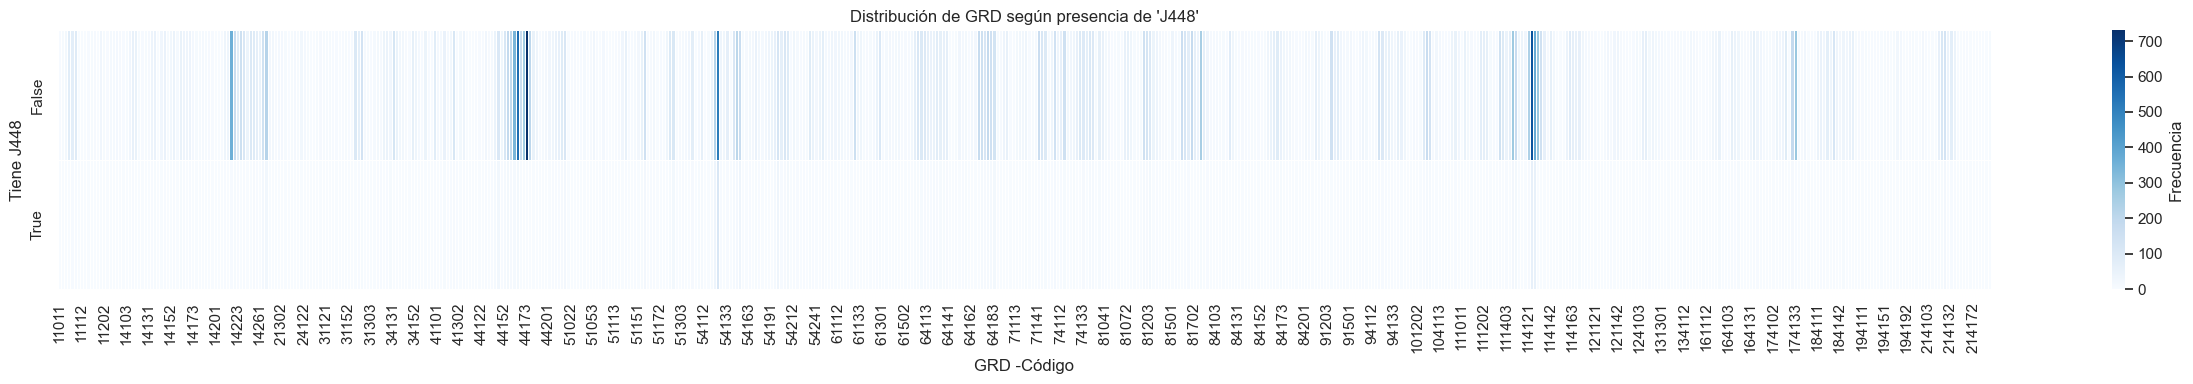

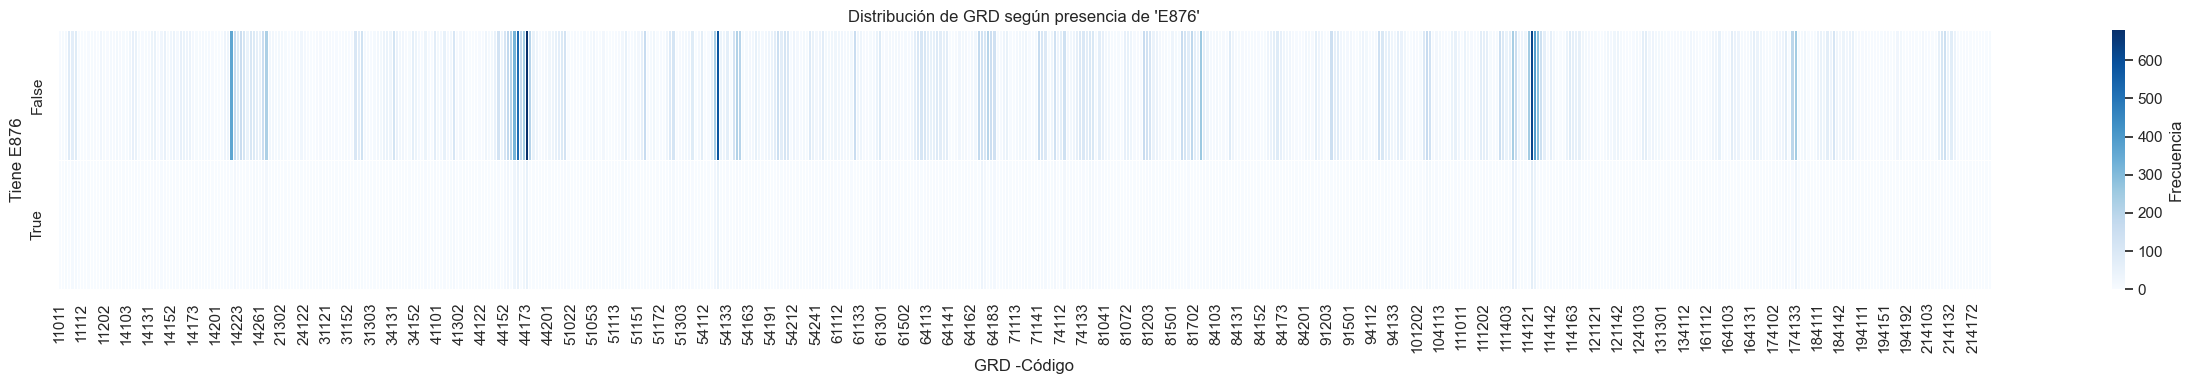

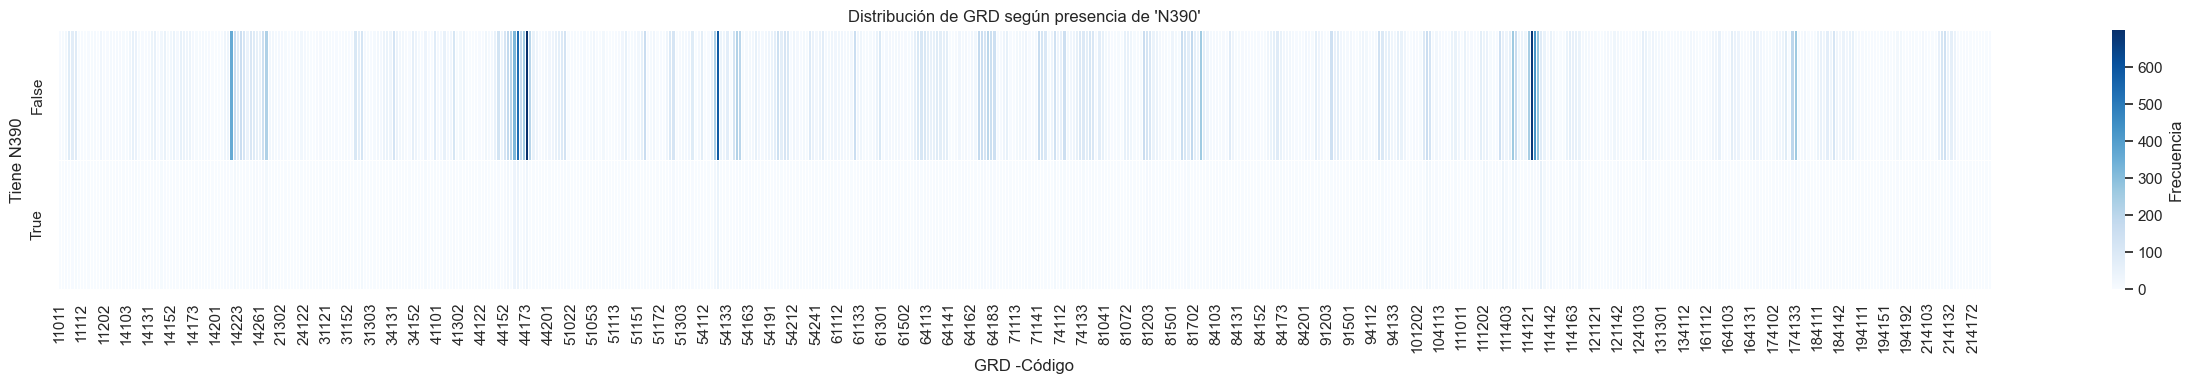

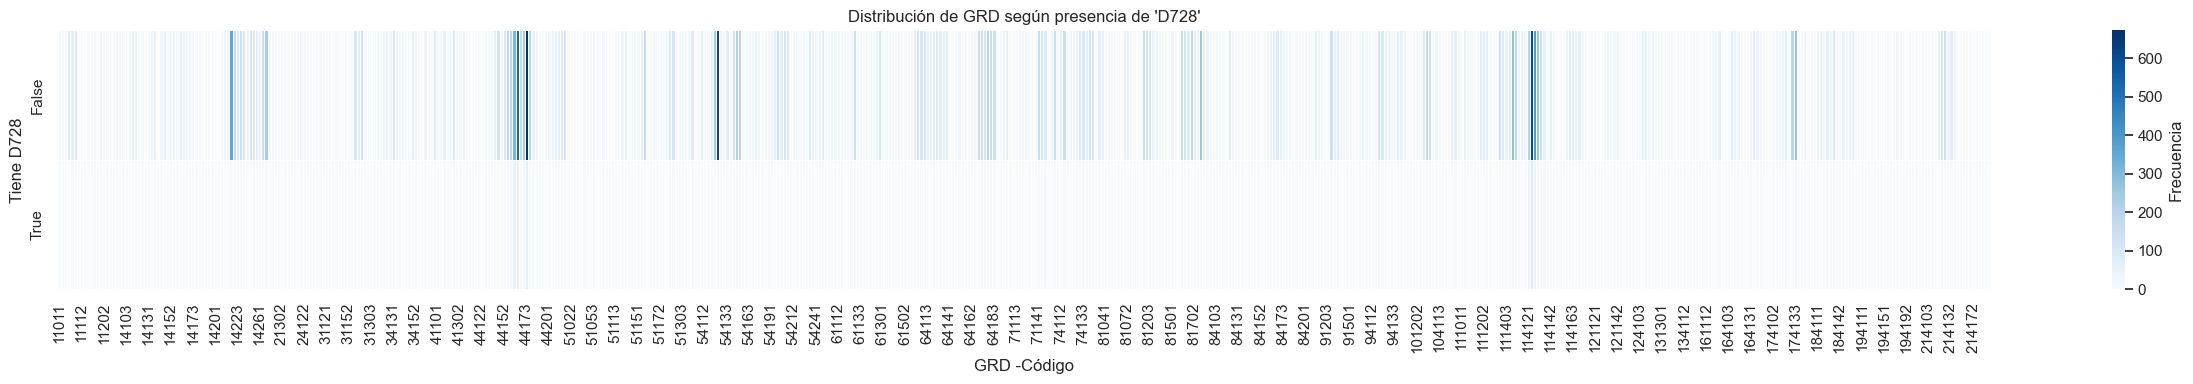

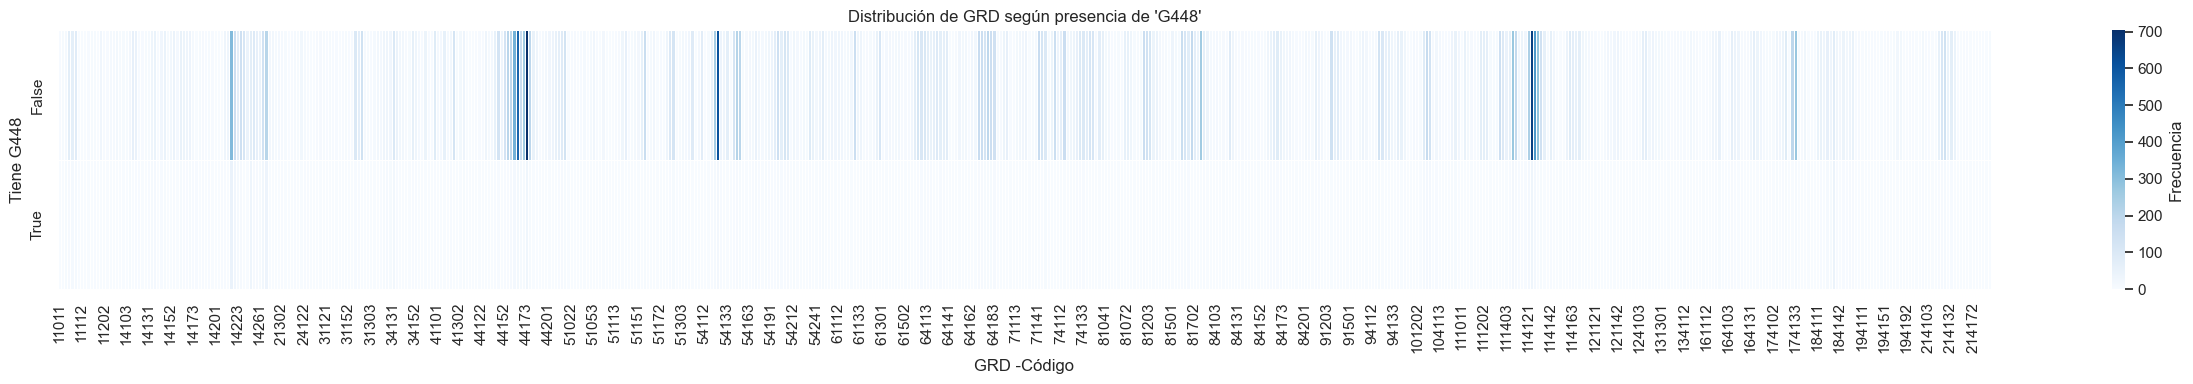

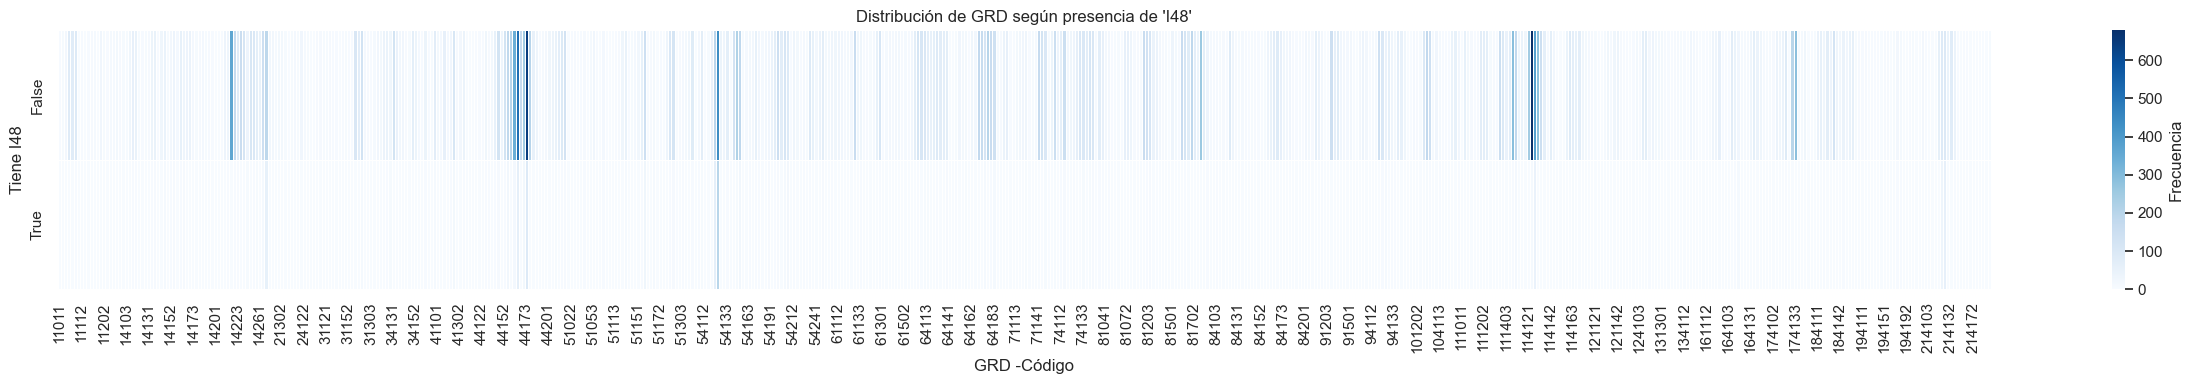

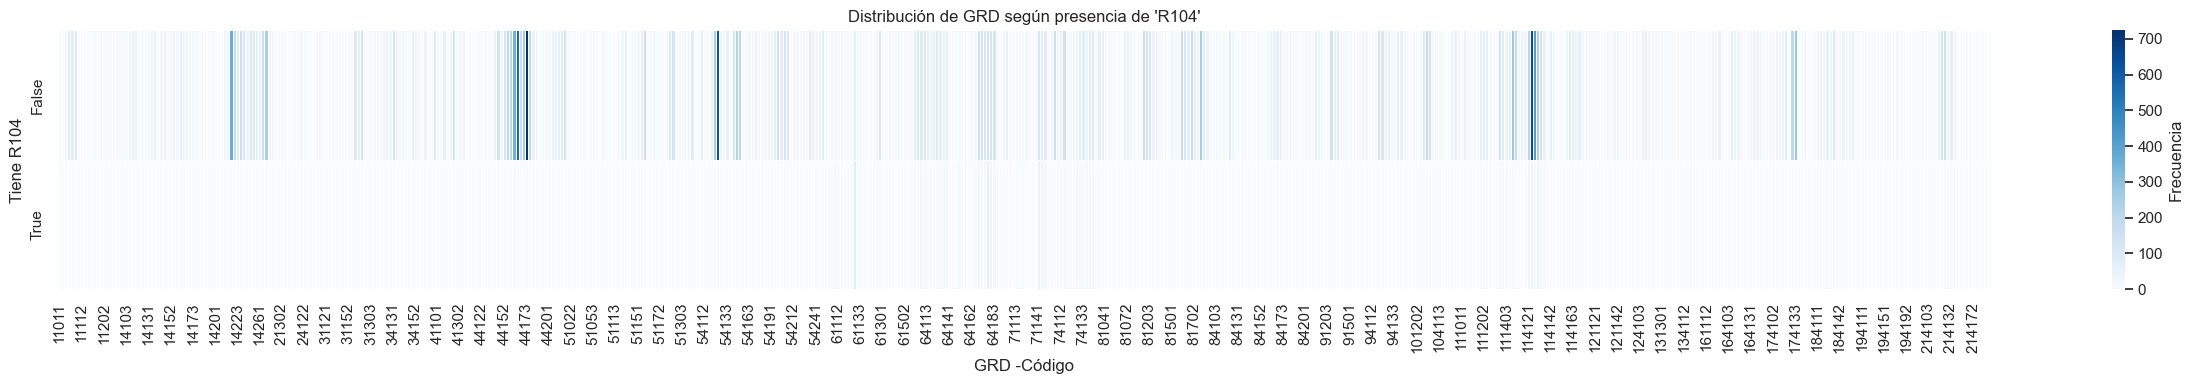

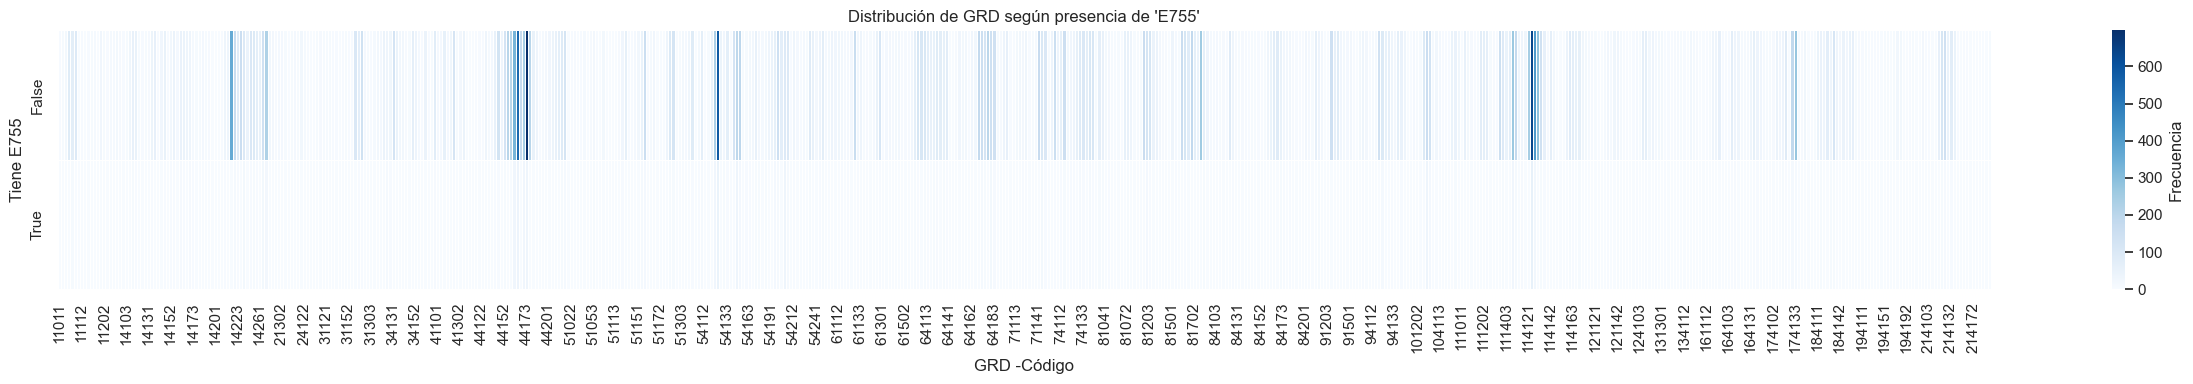

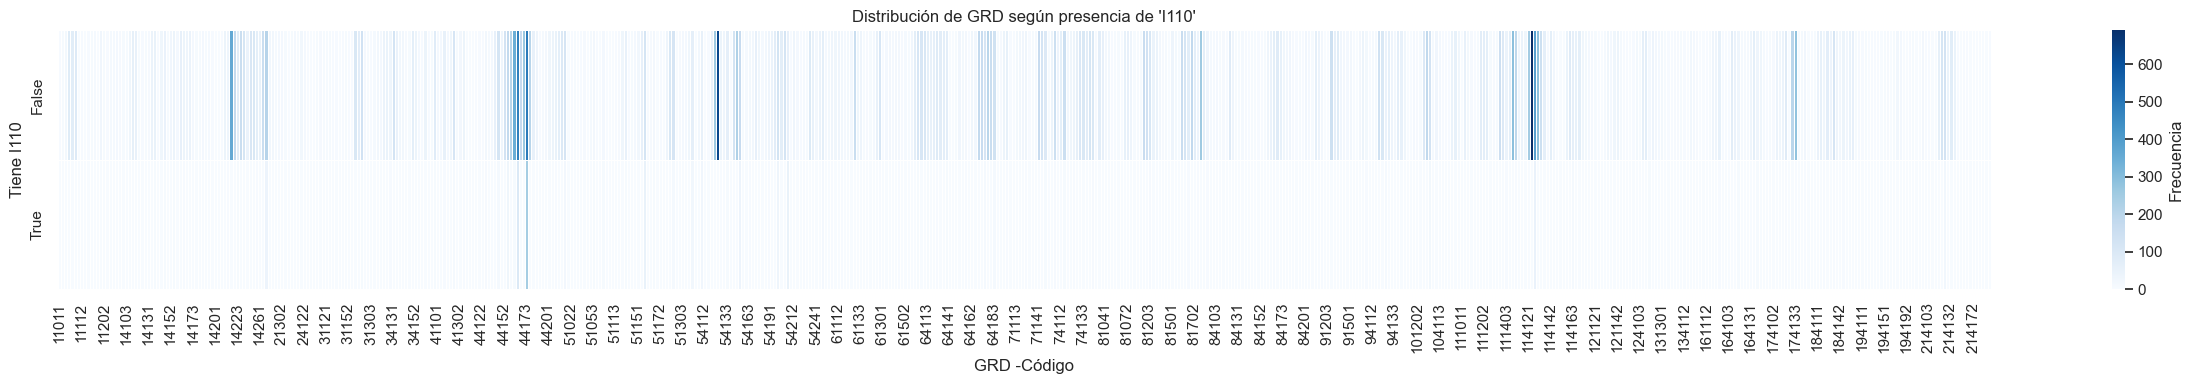

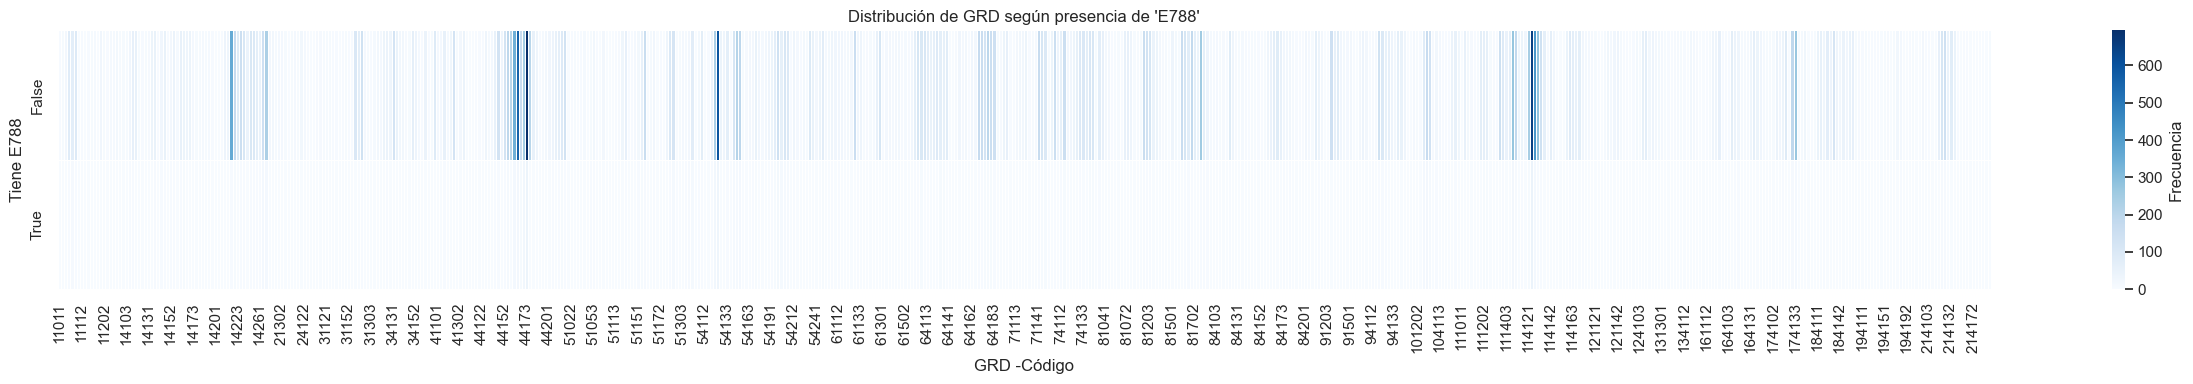

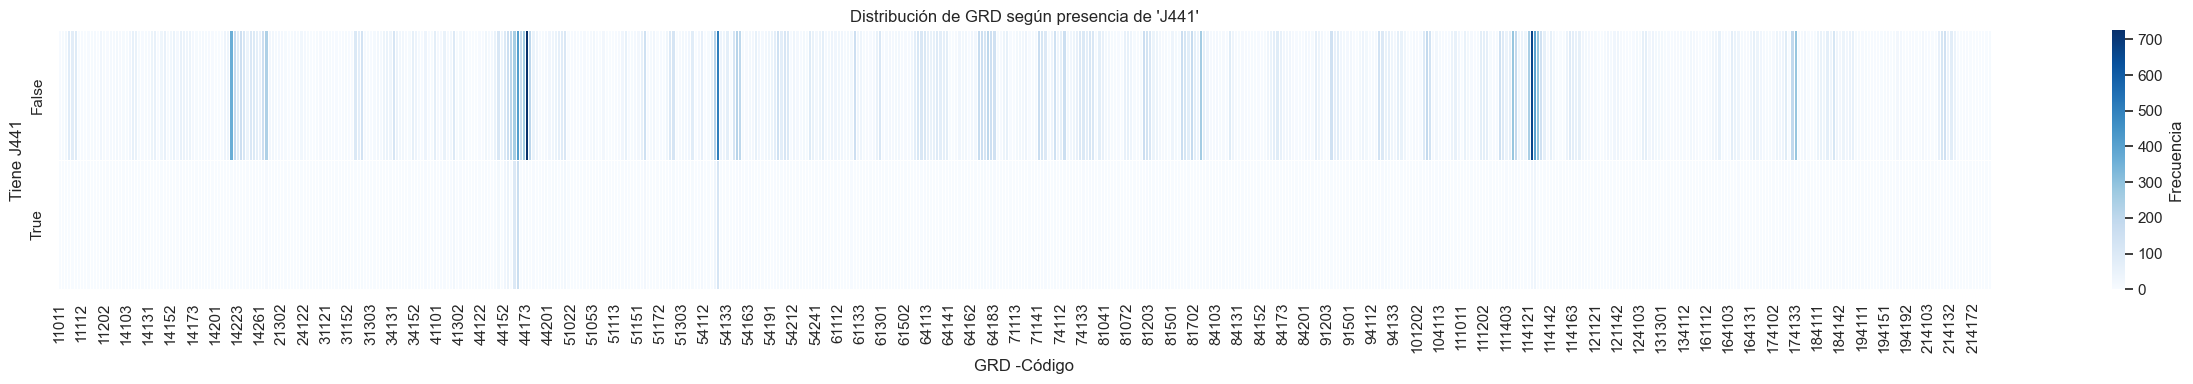

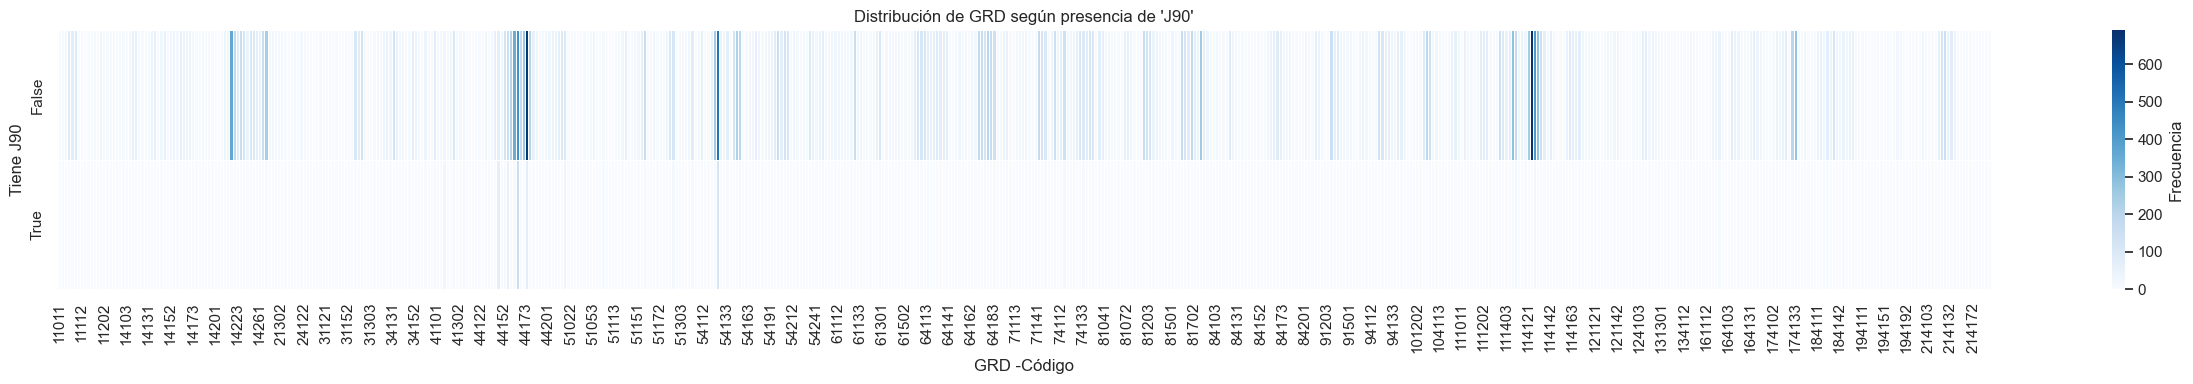

In [9]:
# Identificar columnas de comorbilidades (Dxr 1 a Dxr 10)
comorbilidades = [col for col in df.columns if col.strip().upper().replace('-', ' ').startswith('DXR')]
print("Columnas de comorbilidades:", comorbilidades)

# Conteo de no nulos por columna
print("\nCantidad de diagnósticos registrados en cada columna:")
conteo_por_columna = df[comorbilidades].notnull().sum()
print(conteo_por_columna)

# Combinar todas las columnas en una sola serie y contar frecuencia total
comorb_series = pd.concat([df[col] for col in comorbilidades]).dropna()
conteo_total = comorb_series.value_counts()
print("\nTop 20 comorbilidades más frecuentes:")
print(conteo_total.head(20))

# Crear variable binaria: ¿el paciente tiene al menos una comorbilidad?
df['Tiene_comorbilidad'] = df[comorbilidades].notna().any(axis=1)

# Tabla cruzada: Tiene comorbilidad vs GRD
tabla_binaria = pd.crosstab(df['Tiene_comorbilidad'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_binaria, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Relación entre tener comorbilidades y GRD")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene comorbilidad?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba de Chi²
chi2, p, dof, _ = chi2_contingency(tabla_binaria)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener comorbilidades y el GRD.")
else:
    print("→ No se encontró una asociación significativa.")

# Análisis individual: crear variables binarias para las 20 comorbilidades más frecuentes
top_comorbs = conteo_total.head(20).index

for dx in top_comorbs:
    col_binaria = f"Tiene_{dx}"
    df[col_binaria] = df[comorbilidades].apply(lambda row: dx in row.values, axis=1)

    tabla_dx = pd.crosstab(df[col_binaria], df['GRD -Código'])

    plt.figure(figsize=(25, 4))
    sns.heatmap(tabla_dx, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
    plt.title(f"Distribución de GRD según presencia de '{dx}'")
    plt.xlabel("GRD -Código")
    plt.ylabel(f"Tiene {dx}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">Las variables Dxr 1 a Dxr 10 contienen los diagnósticos relacionados o comorbilidades del paciente al ingreso. Se observan más de 27 mil registros con al menos un diagnóstico secundario, y su frecuencia decrece a medida que se avanza de Dxr 1 a Dxr 10. Las comorbilidades más comunes son entidades clínicas esperadas como hipertensión (I10), tabaquismo (Z720) o diabetes (E116). Se construyó una variable binaria Tiene_comorbilidad que identifica si el paciente tiene al menos una comorbilidad, y esta mostró una asociación estadísticamente significativa con el GRD. Adicionalmente, se generaron variables binarias específicas para las 20 comorbilidades más frecuentes, que también muestran patrones distintos de distribución entre los GRD. Por su relevancia clínica y su fuerte asociación con el desenlace, estas variables deben ser conservadas en el modelo, ya sea como una sola variable indicadora general o como un conjunto de indicadores para comorbilidades específicas, idealmente aquellas más frecuentes y relevantes.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Código causa externa y Causa externa: </strong></p>
    </div>

Valores únicos (Código): 572
Valores únicos (Descripción): 635
Valores nulos (Código): 22397
Valores nulos (Descripción): 22397

Códigos de causa externa más comunes:
Código causa externa
Y838    502
W180    455
W188    286
Y95X    252
Y841    245
Name: count, dtype: int64

Descripciones de causa externa más comunes:
Causa externa
OTROS PROCEDIMIENTOS QUIRURGICOS                          480
OTRAS CAIDAS EN EL MISMO NIVEL VIVIENDA                   439
OTRAS CAIDAS EN EL MISMO NIVEL OTRO LUGAR ESPECIFICADO    283
DIALISIS RENAL                                            239
AFECCION NOSOCOMIAL                                       221
Name: count, dtype: int64


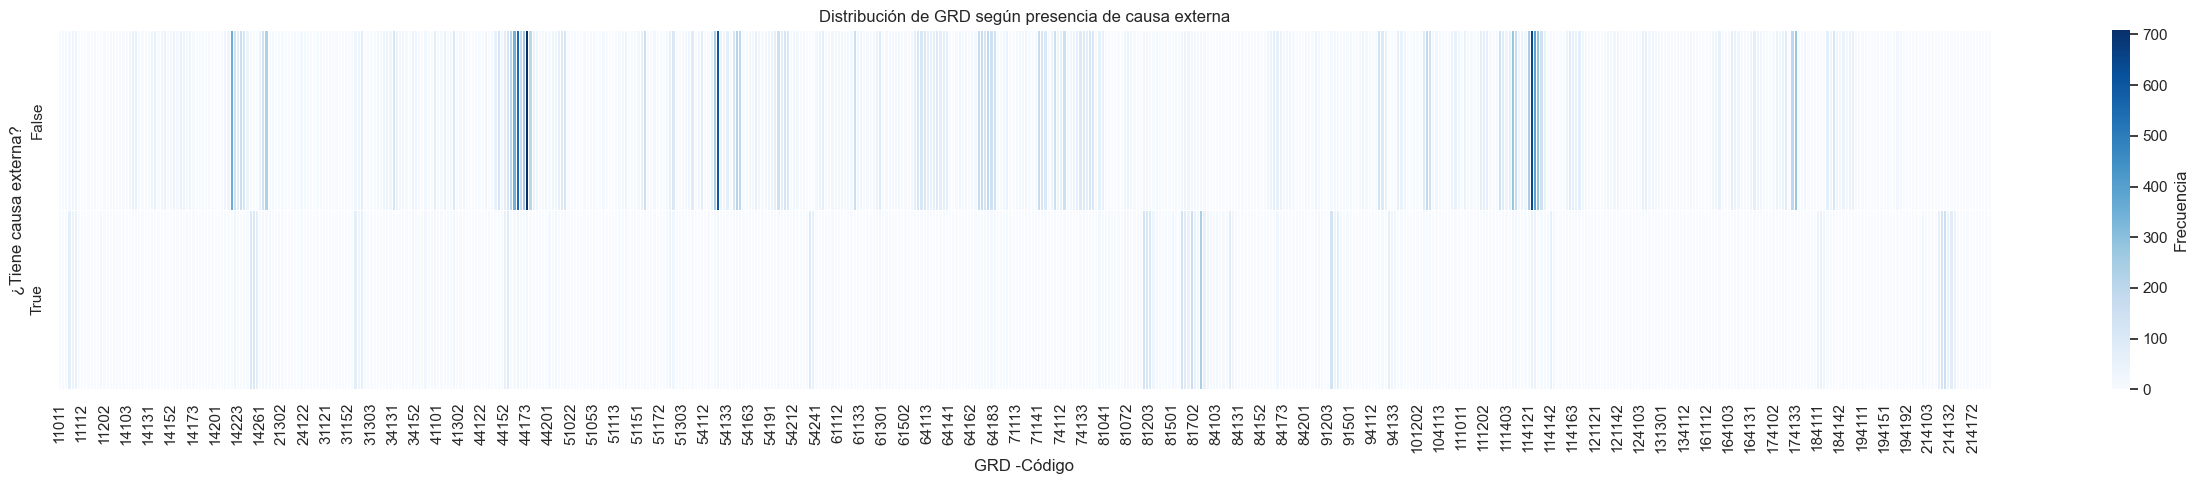


Chi² = 15589.76, p-value = 0.0000
→ Hay una asociación significativa entre tener causa externa y el GRD.


In [10]:
# Normalizar texto: convertir todo a mayúsculas para evitar inconsistencias
df['Causa externa'] = df['Causa externa'].str.upper()

# Verificar cantidad de valores únicos
print("Valores únicos (Código):", df['Código causa externa'].nunique())
print("Valores únicos (Descripción):", df['Causa externa'].nunique())

# Verificar valores nulos
print("Valores nulos (Código):", df['Código causa externa'].isnull().sum())
print("Valores nulos (Descripción):", df['Causa externa'].isnull().sum())

# Frecuencia de los más comunes
print("\nCódigos de causa externa más comunes:")
print(df['Código causa externa'].value_counts().head())

print("\nDescripciones de causa externa más comunes:")
print(df['Causa externa'].value_counts().head())

# Crear variable binaria: ¿tiene causa externa?
df['Tiene_causa_externa'] = df['Código causa externa'].notnull()

# Crosstab: presencia de causa externa vs GRD
tabla_causa = pd.crosstab(df['Tiene_causa_externa'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(tabla_causa, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD según presencia de causa externa")
plt.xlabel("GRD -Código")
plt.ylabel("¿Tiene causa externa?")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prueba Chi²
chi2, p, dof, _ = chi2_contingency(tabla_causa)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre tener causa externa y el GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Código causa externa" indica si el diagnóstico del paciente se asocia a un evento externo, y "Causa externa" proporciona su descripción. Más del 65% de los registros no tienen valores en esta variable, lo cual limita su utilidad como predictor generalizable. Sin embargo, en los casos donde sí se registra, se observan patrones repetitivos: códigos como Y838 (procedimientos quirúrgicos) o W180 (caídas) son los más frecuentes. El análisis gráfico y estadístico muestra una asociación significativa con el GRD, aunque su relevancia está sesgada hacia un subconjunto de casos donde el evento externo fue explícitamente documentado. Además, la relación entre código y descripción presenta inconsistencias (un mismo código puede tener varias descripciones, lo que sugiere mala normalización). Por lo tanto, aunque estadísticamente significativa, esta variable podría introducir ruido por su alta proporción de ausencias e inconsistencias en la codificación.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;">
    <p style="font-size: 12pt;"><strong>Variable Tipo servicio: </strong></p>
    </div>

Valores únicos de Tipo servicio: ['URGENCIA ADULTOS' 'NO APLICA' 'CIRUGÍA' 'URGENCIA PEDÍATRICAS'
 'ATENCIÓN PRIORITARIA']
Valores nulos de Tipo servicio: 0

Frecuencia por categoría: Tipo servicio
URGENCIA ADULTOS        24840
NO APLICA                2351
URGENCIA PEDÍATRICAS      368
CIRUGÍA                   309
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64


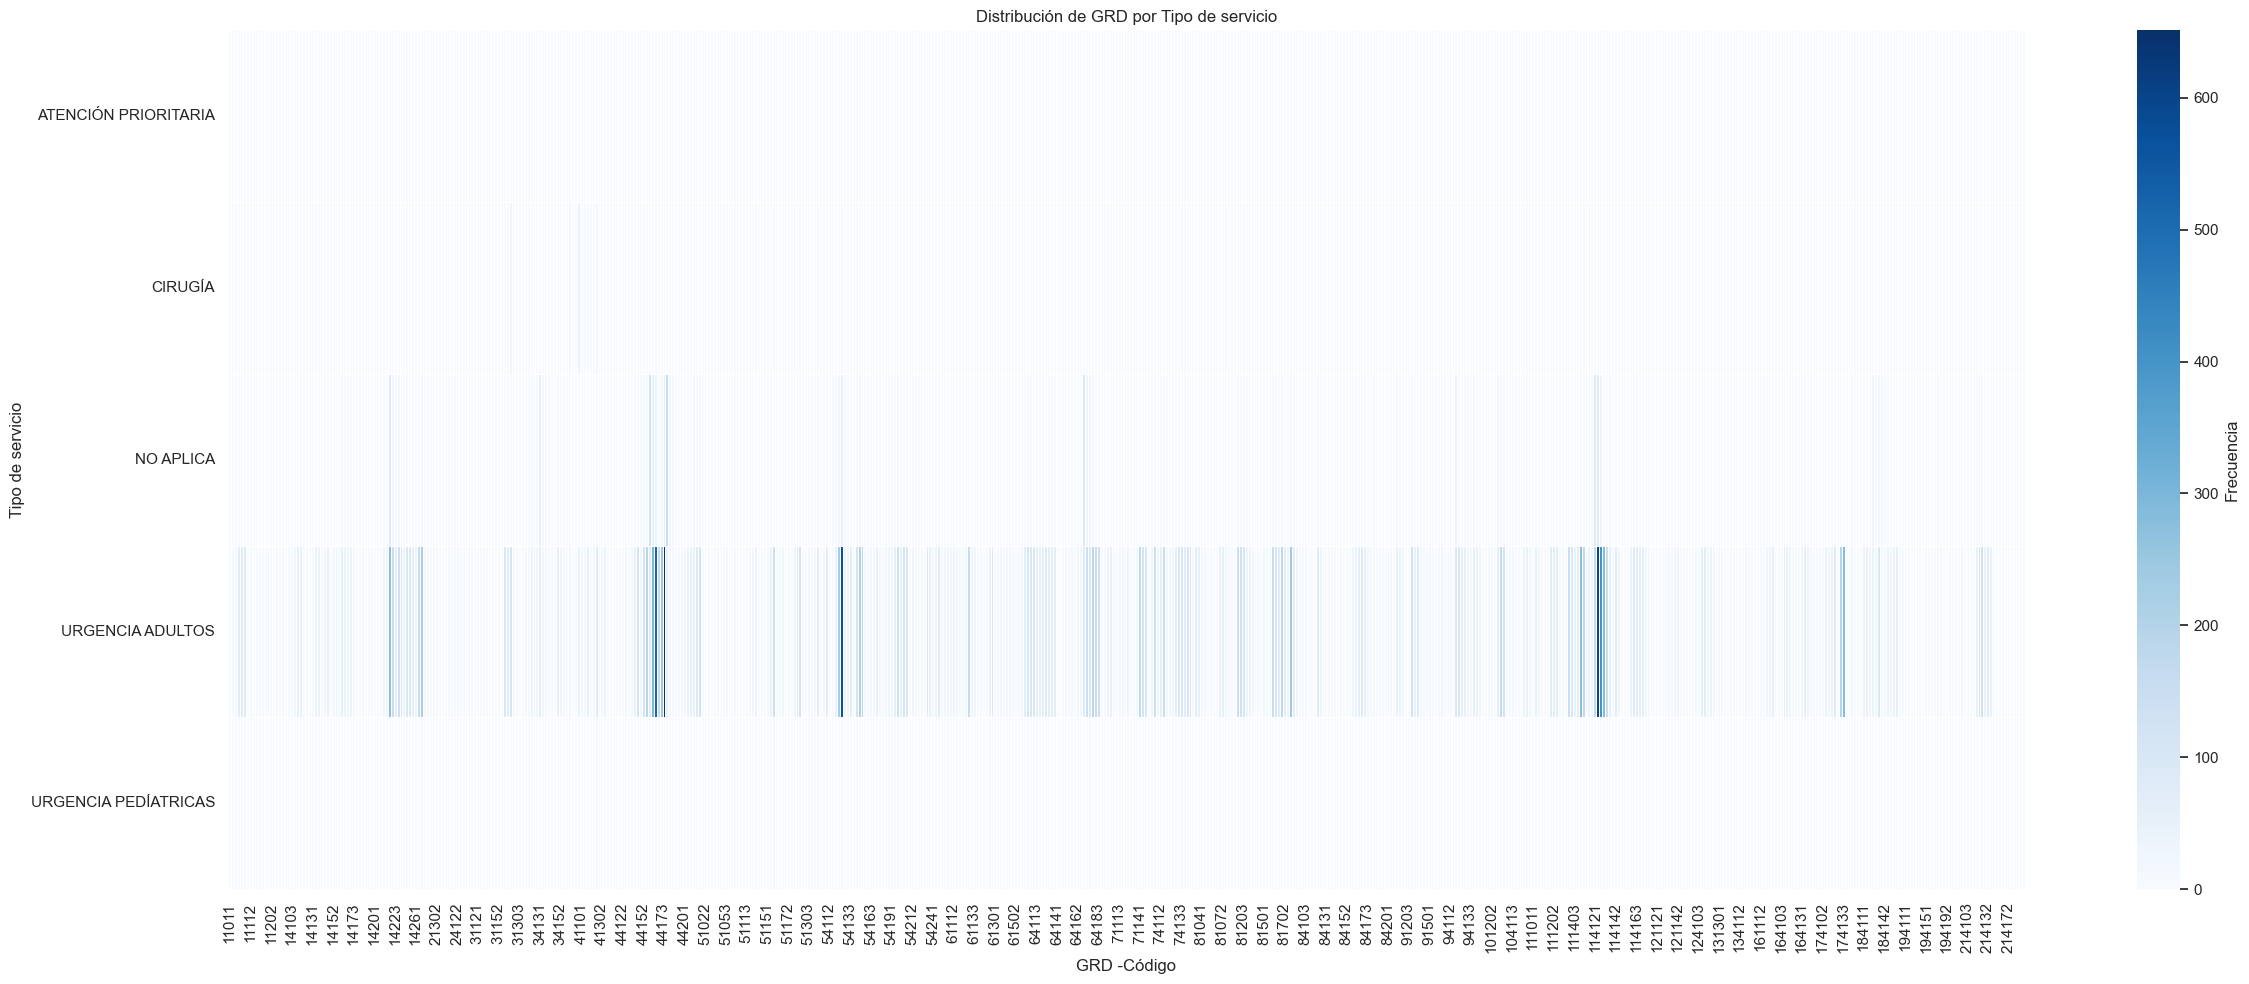


Chi² = 10973.81, p-value = 0.0000
→ Hay una asociación significativa entre Tipo de servicio y GRD.


In [11]:
# Asegurar que la variable sea texto y normalizar: quitar espacios, convertir a mayúsculas
df['Tipo servicio'] = df['Tipo servicio'].astype(str).str.strip().str.upper()

# Agrupar variantes comunes para evitar dispersión de categorías
df['Tipo servicio'] = df['Tipo servicio'].replace({
    'URGENCIA ADULTO': 'URGENCIA ADULTOS',
    'URGENCIA ADULTOS.': 'URGENCIA ADULTOS',
    'URGENCIA - ADULTOS': 'URGENCIA ADULTOS',
    'U. ADULTOS': 'URGENCIA ADULTOS',
    'URGENCIA PEDIATRICAS': 'URGENCIA PEDÍATRICAS',
    'CIRUGIA': 'CIRUGÍA',
    'N0 APLICA': 'NO APLICA',
    'NAN': 'NO APLICA'
})

# Verificar valores únicos y nulos
print(f"Valores únicos de Tipo servicio: {df['Tipo servicio'].unique()}")
print(f"Valores nulos de Tipo servicio: {df['Tipo servicio'].isnull().sum()}")

# Ver distribución de frecuencias
print(f"\nFrecuencia por categoría: {df['Tipo servicio'].value_counts()}")

# Tabla cruzada: Tipo servicio vs GRD
servicio_grd = pd.crosstab(df['Tipo servicio'], df['GRD -Código'])

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(servicio_grd, cmap='Blues', linewidths=0.5, linecolor='white', cbar_kws={"label": "Frecuencia"})
plt.title("Distribución de GRD por Tipo de servicio")
plt.xlabel("GRD -Código")
plt.ylabel("Tipo de servicio")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Prueba Chi²
chi2, p, dof, _ = chi2_contingency(servicio_grd)
print(f"\nChi² = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Hay una asociación significativa entre Tipo de servicio y GRD.")
else:
    print("→ No se encontró asociación significativa.")


<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> <p style="font-size: 12pt;">La variable "Tipo servicio" presenta inicialmente múltiples variantes textuales para una misma categoría, las cuales fueron normalizadas para reducir ruido. Después de esta limpieza, se identifican cinco categorías principales: "URGENCIA ADULTOS", "URGENCIA PEDÍATRICAS", "CIRUGÍA", "NO APLICA" y un caso aislado de "ATENCIÓN PRIORITARIA". La distribución está altamente desbalanceada, con más del 85% de los casos concentrados en "URGENCIA ADULTOS". El análisis cruzado con GRD muestra diferencias leves entre categorías, pero no se observan patrones predictivos fuertes o específicos. La prueba de chi-cuadrado indica una asociación estadísticamente significativa, aunque esto probablemente se deba al tamaño de muestra. Dada la desproporción extrema y la baja capacidad discriminativa observada en el heatmap, esta variable puede introducir más ruido que señal. Se descarta del modelo predictivo.</p> </div>

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> 
    <h4 style="font-size: 14pt;">Criterios de exclusión de variables no disponibles al ingreso del paciente</h4>
    <p style="font-size: 12pt;">Para el desarrollo de un modelo de predicción del Grupo Relacionado por Diagnóstico (GRD) basado en información disponible al ingreso del paciente, es fundamental restringir las variables predictoras a aquellas que estén efectivamente disponibles en ese momento. Incluir variables que dependen de eventos posteriores, como diagnósticos de egreso, procedimientos realizados durante la hospitalización, estancia en cuidados intensivos o la causa de muerte, introduce un sesgo temporal conocido como leakage o fuga de información. Este sesgo genera un modelo que aprende a partir de datos que no estarían disponibles en un escenario real de predicción, lo que compromete su validez y generalización. Por este motivo, se descartan del modelo todas las variables asociadas al egreso, evolución hospitalaria o procedimientos post-admisión, ya que su presencia distorsionaría el propósito predictivo centrado en el momento de admisión del paciente.</p> 
</div>

<table border="1" style="border-collapse: collapse; font-family: 'Times New Roman', Times, serif; font-size: 12pt; text-align: left; width: 100%;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th style="padding: 6px;">Variable</th>
      <th style="padding: 6px;">¿Incluir en el modelo?</th>
      <th style="padding: 6px;">Justificación</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 6px;">Num caso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Identificador único sin valor predictivo</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Aseguradora -Código- / Descripción</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Asociación débil con GRD y riesgo de inconsistencias</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Edad / Grupo Edad</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Información demográfica relevante y disponible al ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Sexo</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Variable demográfica básica, útil para clasificación</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Codigo de ciudad</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Alta cardinalidad, sin valor clínico directo</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Fecha de ingreso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Distribución homogénea sin valor predictivo relevante</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Tipo de ingreso</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Asociación significativa con GRD, variable disponible al ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Fecha de egreso</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, no disponible en tiempo real</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Días estancia</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, generada tras evolución hospitalaria</td>
    </tr>
    <tr>
      <td style="padding: 6px;">ServicioAlta</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, dependiente al proceso de atención</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Cuidados intensivos / Días de UCI</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable posterior al ingreso, dependiente de evolución</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Dx de ingreso</td>
      <td style="padding: 6px;">Evaluar</td>
      <td style="padding: 6px;">----</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Dx principal de egreso / .1 / 3 Caracteres</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Diagnósticos de egreso, no disponibles al momento de admisión</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Dxr 1 a Dxr 10</td>
      <td style="padding: 6px;">Sí</td>
      <td style="padding: 6px;">Diagnósticos de ingreso asociados al estado clínico inicial</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Código causa externa / Causa externa</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Muy alta tasa de nulos</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Situacion al alta</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Desenlace hospitalario posterior</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Proc1 a Proc30</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Todos son procedimientos realizados después del ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Tipo servicio</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Desbalance extremo y bajo poder predictivo</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Causa básica de muerte</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Variable de egreso, asociada a desenlace</td>
    </tr>
    <tr>
      <td style="padding: 6px;">Infecciones / Infección quirúrgica</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Surgen durante la hospitalización, no disponibles al ingreso</td>
    </tr>
    <tr>
      <td style="padding: 6px;">GRD -Código</td>
      <td style="padding: 6px;">Objetivo</td>
      <td style="padding: 6px;">Variable dependiente a predecir</td>
    </tr>
    <tr>
      <td style="padding: 6px;">GRD -Descripción / Tipo GRD</td>
      <td style="padding: 6px;">No</td>
      <td style="padding: 6px;">Redundante con el objetivo; no aporta al modelo</td>
    </tr>
  </tbody>
</table>


In [12]:
# Columnas base (al ingreso)
cols_base = [
    'Grupo Edad', 'Sexo', 'Tipo de ingreso',
    'Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4', 'Dxr 5',
    'Dxr 6', 'Dxr 7', 'Dxr 8', 'Dxr 9', 'Dxr 10'
]

# Columnas binarias derivadas
cols_binarias = [
    'Tiene_comorbilidad', 'Tiene_I10', 'Tiene_Z720', 'Tiene_E038', 'Tiene_I270', 'Tiene_I120',
    'Tiene_E106', 'Tiene_D648', 'Tiene_E116', 'Tiene_J448', 'Tiene_E876', 'Tiene_N390',
    'Tiene_D728', 'Tiene_G448', 'Tiene_I48', 'Tiene_R104', 'Tiene_E755', 'Tiene_I110',
    'Tiene_E788', 'Tiene_J441', 'Tiene_J90'
]

# Variable objetivo
target = ['GRD -Código']

# Crear dataset final
df_modelo_final = df[cols_base + cols_binarias + target].copy()

# Limpieza: normalizar categóricas básicas
df_modelo_final['Sexo'] = df_modelo_final['Sexo'].astype(str).str.strip().str.upper()
df_modelo_final['Tipo de ingreso'] = df_modelo_final['Tipo de ingreso'].astype(str).str.strip().str.upper()
df_modelo_final['Tipo de ingreso'] = df_modelo_final['Tipo de ingreso'].replace({
    'URGENCIAS': 'URGENCIA'
})

# Asegurar None en diagnósticos faltantes
dxr_cols = [col for col in df_modelo_final.columns if col.startswith('Dxr')]
df_modelo_final[dxr_cols] = df_modelo_final[dxr_cols].where(df_modelo_final[dxr_cols].notnull(), None)

# Confirmar forma
print(f"Dimensiones del DataFrame final: {df_modelo_final.shape}")
df_modelo_final.head()


Dimensiones del DataFrame final: (27869, 35)


Grupo Edad Sexo Tipo de ingreso Dxr 1 Dxr 2 Dxr 3 Dxr 4 Dxr 5 Dxr 6 Dxr 7  \
0      35-39    F        URGENCIA  I652  C189  C787  C788  N390  A048  D648   
1      25-29    M        URGENCIA  B210  B204  B162  A530  D538  A071  E538   
2      35-39    M        URGENCIA  B451  G052  B588   D70  D698  A072  D618   
3      20-24    M        URGENCIA  B200  B210  A600  N518  A530  A073  D696   
4      60-64    M        URGENCIA  Y838  C140  N390  B961  B962  A099  D508   

  Dxr 8 Dxr 9 Dxr 10  Tiene_comorbilidad  Tiene_I10  Tiene_Z720  Tiene_E038  \
0  R060  None   None                True      False       False       False   
1   D70  A071   None                True      False       False       False   
2  E871  E876   None                True      False       False       False   
3  R103  None   None                True      False       False       False   
4  E871  Z931   None                True      False       False       False   

   Tiene_I270  Tiene_I120  Tiene_E106  Tiene_D648  Tiene_E116  Tiene_J448  \
0       False       False       False        True       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False       False       False       False       False       False   

   Tiene_E876  Tiene_N390  Tiene_D728  Tiene_G448  Tiene_I48  Tiene_R104  \
0       False        True       False       False      False       False   
1       False       False       False       False      False       False   
2        True       False       False       False      False       False   
3       False       False       False       False      False       False   
4       False        True       False       False      False       False   

   Tiene_E755  Tiene_I110  Tiene_E788  Tiene_J441  Tiene_J90  GRD -Código  
0       False       False       False       False      False        14143  
1       False       False       False       False      False       184153  
2       False       False       False       False      False       184153  
3       False       False       False       False      False       184153  
4       False       False       False       False      False       184112

In [13]:
# Copia del dataframe del modelo para codificar
df_procesamiento = df_modelo_final.copy()

# Convertir variables categoricas con solo 2 valores únicos en binario
df_procesamiento['Sexo_bin'] = df_procesamiento['Sexo'].map({'F': 0, 'M': 1})
df_procesamiento['Tipo_ingreso_bin'] = df_procesamiento['Tipo de ingreso'].map({'PROGRAMADO': 0, 'URGENCIA': 1})
df_procesamiento = df_procesamiento.drop(columns=['Sexo', 'Tipo de ingreso'])

# Convertir las variables categoricas en valores binarios según el Grupo Edad
df_cat = pd.get_dummies(df_procesamiento[['Grupo Edad']], prefix='Grupo Edad')
df_cat = df_cat.astype(int)

## Codificar todos las posibles conmorbilidades posibles
# Llenar espacios vacios con None
df_dxrs = df_procesamiento[[f'Dxr {i}' for i in range(1, 11)]].fillna('None')

# Aplanar por paciente (fila), creando un solo vector de diagnóstico por paciente
df_dxrs_flat = df_dxrs.apply(lambda row: list(set(row.values)), axis=1)

# Convertir a DataFrame de codificación one-hot
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_dxrs_encoded = pd.DataFrame(mlb.fit_transform(df_dxrs_flat), columns=mlb.classes_, index=df_procesamiento.index)

# Convertir columnas binarias
binary_cols = [col for col in df_procesamiento.columns if col.startswith('Tiene_')] + ['Sexo_bin', 'Tipo_ingreso_bin']
df_binaries = df_procesamiento[binary_cols].astype(int)

# Concatenamos en un dataframe final
df_final = pd.concat([df_cat, df_dxrs_encoded, df_binaries], axis=1)
df_final.to_csv('df_final.csv', index=False)
df_final.head()

Grupo Edad_1-4  Grupo Edad_10-14  Grupo Edad_15-19  Grupo Edad_20-24  \
0               0                 0                 0                 0   
1               0                 0                 0                 0   
2               0                 0                 0                 0   
3               0                 0                 0                 1   
4               0                 0                 0                 0   

   Grupo Edad_25-29  Grupo Edad_30-34  Grupo Edad_35-39  Grupo Edad_40-44  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Grupo Edad_45-49  Grupo Edad_5-9  Grupo Edad_50-54  Grupo Edad_55-59  \
0                 0               0                 0                 0   
1                 0               0                 0                 0   
2                 0               0                 0                 0   
3                 0               0                 0                 0   
4                 0               0                 0                 0   

   Grupo Edad_60-64  Grupo Edad_65-69  Grupo Edad_70-74  Grupo Edad_75-79  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 1                 0                 0                 0   

   Grupo Edad_80-84  Grupo Edad_85-89  Grupo Edad_< 1   Grupo Edad_> 90  A020  \
0                 0                 0                0                0     0   
1                 0                 0                0                0     0   
2                 0                 0                0                0     0   
3                 0                 0                0                0     0   
4                 0                 0                0                0     0   

   A021  A022  A028  A047  A048  A058  A060  A062  A064  A065  A068  A069  \
0     0     0     0     0     1     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   A071  A072  A073  A080  A083  A084  A099  A0999  A150  A151  A152  A153  \
0     0     0     0     0     0     0     0      0     0     0     0     0   
1     1     0     0     0     0     0     0      0     0     0     0     0   
2     0     1     0     0     0     0     0      0     0     0     0     0   
3     0     0     1     0     0     0     0      0     0     0     0     0   
4     0     0     0     0     0     0     1      0     0     0     0     0   

   A154  A156  A157  A158  A160  A161  A162  A163  A164  A165  A168  A170  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   A178  A180  A182  A183  A185  A187  A188  A191  A198  A278  A310  A318  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0 

<div style="text-align: justify; font-family: 'Times New Roman', Times, serif; line-height: 1.5;"> 
    <p style="font-size: 12pt;">Para obtener el dataframe codificado `df_final` a partir del `df_modelo_final`, se realizó un preprocesamiento estructurado enfocado en la preparación de variables categóricas y binarización. Primero, se generó una copia de trabajo (`df_procesamiento`) para evitar modificar el original. Las variables categóricas binarias `Sexo` y `Tipo de ingreso` se transformaron a formato numérico (0 y 1) y se eliminaron sus versiones originales. Luego, se aplicó codificación one-hot a la variable `"Grupo Edad"` para representar cada grupo etario con columnas binarias. Para las comorbilidades, se extrajeron las columnas `Dxr 1` a `Dxr 10`, se reemplazaron los valores faltantes por `'None'`, y se aplanaron por fila eliminando repeticiones por paciente. Usando `MultiLabelBinarizer`, se codificaron en un dataframe donde cada columna representa la presencia (1) o ausencia (0) de un diagnóstico único, resultando en más de 4.000 columnas. Esta alta dimensionalidad se mantuvo intencionalmente para conservar toda la riqueza clínica del dataset y permitir la detección de patrones potencialmente útiles, incluso si son poco frecuentes. Finalmente, se agruparon las variables binarias específicas (como `Tiene_diabetes`, `Tiene_cancer`, etc.), las variables codificadas de edad y las comorbilidades en un único dataframe consolidado (`df_final`), que fue exportado como archivo CSV. Aunque se retuvieron todas las comorbilidades por motivos de exhaustividad y análisis avanzado, se contempla dividir este conjunto en dos versiones: una completa para modelos complejos y otra reducida con solo las 20 comorbilidades más frecuentes, para tareas más ligeras o interpretables.</p>
</div>


In [14]:
import pandas as pd

# Leerlo para comprobar
df_verificacion = pd.read_csv('df_final.csv')
df_verificacion.head()


Grupo Edad_1-4  Grupo Edad_10-14  Grupo Edad_15-19  Grupo Edad_20-24  \
0               0                 0                 0                 0   
1               0                 0                 0                 0   
2               0                 0                 0                 0   
3               0                 0                 0                 1   
4               0                 0                 0                 0   

   Grupo Edad_25-29  Grupo Edad_30-34  Grupo Edad_35-39  Grupo Edad_40-44  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Grupo Edad_45-49  Grupo Edad_5-9  Grupo Edad_50-54  Grupo Edad_55-59  \
0                 0               0                 0                 0   
1                 0               0                 0                 0   
2                 0               0                 0                 0   
3                 0               0                 0                 0   
4                 0               0                 0                 0   

   Grupo Edad_60-64  Grupo Edad_65-69  Grupo Edad_70-74  Grupo Edad_75-79  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 1                 0                 0                 0   

   Grupo Edad_80-84  Grupo Edad_85-89  Grupo Edad_< 1   Grupo Edad_> 90  A020  \
0                 0                 0                0                0     0   
1                 0                 0                0                0     0   
2                 0                 0                0                0     0   
3                 0                 0                0                0     0   
4                 0                 0                0                0     0   

   A021  A022  A028  A047  A048  A058  A060  A062  A064  A065  A068  A069  \
0     0     0     0     0     1     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   A071  A072  A073  A080  A083  A084  A099  A0999  A150  A151  A152  A153  \
0     0     0     0     0     0     0     0      0     0     0     0     0   
1     1     0     0     0     0     0     0      0     0     0     0     0   
2     0     1     0     0     0     0     0      0     0     0     0     0   
3     0     0     1     0     0     0     0      0     0     0     0     0   
4     0     0     0     0     0     0     1      0     0     0     0     0   

   A154  A156  A157  A158  A160  A161  A162  A163  A164  A165  A168  A170  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   A178  A180  A182  A183  A185  A187  A188  A191  A198  A278  A310  A318  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0 